# <b> Project Title : Online Retail Customer Segmentation. </b>

**Project type** - Unsupervised Machine Learning

**Contribution** - Individual: **Rishi Anil Shah**

###**Github link:**
https://github.com/RishiAtWork1

## <b> Problem Statement </b>
**In this project, our task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.**

## <b> Data Description </b>

### <b>Attribute Information: </b>

* **InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* **StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* **Description:** Product (item) name. Nominal.
* **Quantity:** The quantities of each product (item) per transaction. Numeric.
* **InvoiceDate:** Invice Date and time. Numeric, the day and time when each transaction was generated.
* **UnitPrice:** Unit price. Numeric, Product price per unit in sterling.
* **CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* **Country:** Country name. Nominal, the name of the country where each customer resides.

# **Importing Libraries and Dataset**

In [ ]:
#importing required libraries to handle dataset
import numpy as np
import pandas as pd

# For plots and visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
from yellowbrick.cluster import SilhouetteVisualizer

# For getting optimal number of clusters in hierarchical clustering
from scipy.cluster.hierarchy import dendrogram,linkage
# To scale the data
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# metrics to evaluate the clusters
from sklearn.metrics import silhouette_score, silhouette_samples
# Clustering alorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
# Display utilities
from IPython.display import Markdown, display
from datetime import timedelta
!pip install pyxlsb


# activating DND to disregard the warnings by goiing silent mode
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading the dataset
df = pd.read_excel('/content/drive/MyDrive/DATA/Online Retail.xlsx')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,40190.351389,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,40190.351389,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,40190.351389,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,40190.351389,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,40190.351389,3.39,17850.0,United Kingdom


In [ ]:
#getting shape of the dataset
df.shape

(541909, 8)

In [ ]:
#finding null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#drop null value rows from description and customer id
df.dropna(subset=['Description', 'CustomerID'], inplace=True)


In [ ]:
#checking the dataset
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
#checking duplicate
print(len(df[df.duplicated()]))

5225


In [ ]:
#dropping duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
#getting nunique values from different features
df.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [ ]:
df.shape

(401604, 8)

In [ ]:
# InvoiceNo starting with 'C' represents cancellation
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
cancellations = df[df['InvoiceNo'].str.contains('C')]
cancellations.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,40190.403472,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,40190.409028,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,40190.433333,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,40190.433333,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,40190.433333,0.29,17548.0,United Kingdom


In [ ]:
#Getting unique value from cancelled data
cancellations.nunique()

InvoiceNo      3654
StockCode      1920
Description    1945
Quantity        134
InvoiceDate    3586
UnitPrice       376
CustomerID     1589
Country          28
dtype: int64

In [ ]:
#Print the percentage of cancelled product
cancel_product = cancellations['InvoiceNo'].value_counts().sum()
total_product = df['InvoiceNo'].value_counts().sum()
print("Number of cancelled products data", cancel_product,
      'Percentage of cancelled data',(cancel_product*100/total_product), "\n")

Number of cancelled products data 8872 Percentage of cancelled data 2.209141343213713 



In [ ]:
# Dropping cancellations from the main dataframe
df = df[~df['InvoiceNo'].str.contains('C')]

In [ ]:
# checking null counts and datatype in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392732 non-null  object 
 1   StockCode    392732 non-null  object 
 2   Description  392732 non-null  object 
 3   Quantity     392732 non-null  int64  
 4   InvoiceDate  392732 non-null  object 
 5   UnitPrice    392732 non-null  float64
 6   CustomerID   392732 non-null  float64
 7   Country      392732 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


**Feature Engineering**

> Indented block



In [ ]:
# Creating new features from the datetime column InvoiceDate
df["year"]  = pd.to_datetime(df["InvoiceDate"]).apply(lambda x: x.year)
df['Month'] = pd.to_datetime(df['InvoiceDate']).apply(lambda x: x.month_name())
df['Day']   = pd.to_datetime(df['InvoiceDate']).apply(lambda x: x.day_name())
df["hour"]  = pd.to_datetime(df["InvoiceDate"]).apply(lambda x: x.hour)

In [ ]:
# Creating a new feature 'TotalAmount' by multiplying Quantity and UnitPrice
df['TotalAmount'] = round((df['Quantity']*df['UnitPrice']),2)

In [ ]:
# Creating a new feature 'TimeType' based on hours to define whether its Morning,Afternoon or Evening
df['TimeType'] = np.where((df["hour"]>5)&(df["hour"]<18), np.where(
                           df["hour"]<12, 'Morning','Afternoon'),'Evening')


Here, we will drop InvoiceDate, year columns. because we have the data of whole year.

In [ ]:
#dropping the and year column
df.drop(columns=['year'],axis=1,inplace=True)

In [ ]:
#getting info of data
print(df.columns)
df.nunique()

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Month', 'Day', 'hour',
       'TotalAmount', 'TimeType'],
      dtype='object')


InvoiceNo      18536
StockCode       3665
Description     3877
Quantity         302
InvoiceDate    17286
UnitPrice        441
CustomerID      4339
Country           37
Month             12
Day                6
hour              16
TotalAmount     2699
TimeType           3
dtype: int64

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,hour,TotalAmount,TimeType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,40190.351389,2.55,17850.0,United Kingdom,January,Thursday,0,15.30,Evening
1,536365,71053,WHITE METAL LANTERN,6,40190.351389,3.39,17850.0,United Kingdom,January,Thursday,0,20.34,Evening
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,40190.351389,2.75,17850.0,United Kingdom,January,Thursday,0,22.00,Evening
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,40190.351389,3.39,17850.0,United Kingdom,January,Thursday,0,20.34,Evening
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,40190.351389,3.39,17850.0,United Kingdom,January,Thursday,0,20.34,Evening


## **Exploratory Data Analysis**

> Indented block



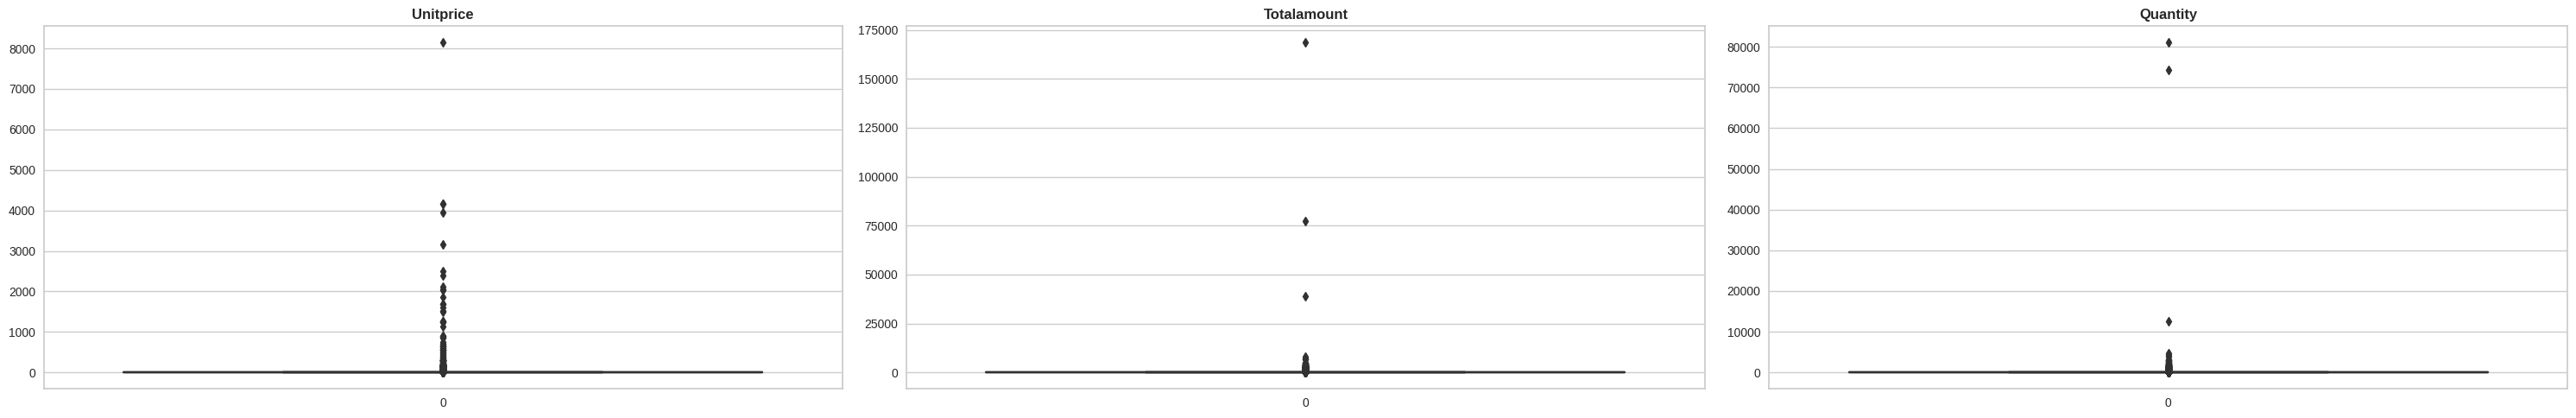

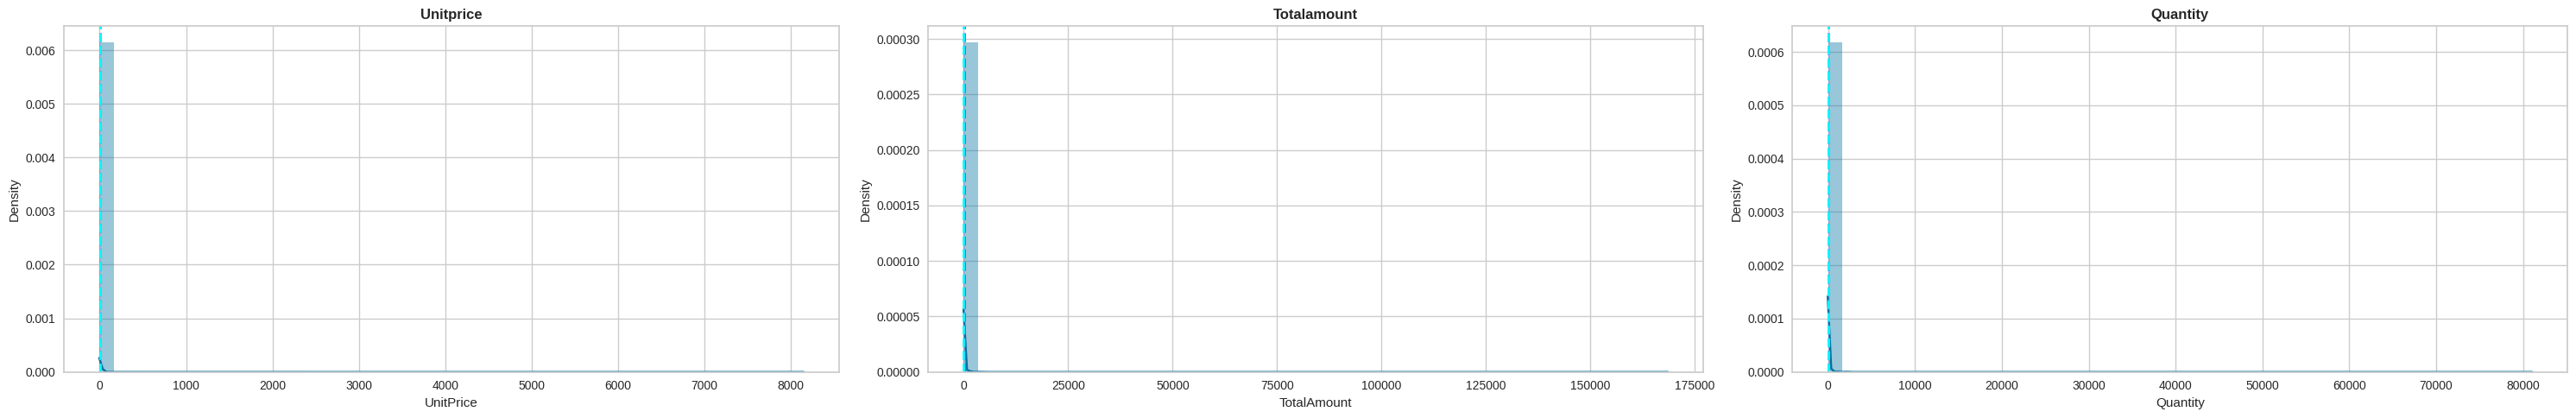

In [ ]:
# Visualization of after handling the outliers.
plt.figure(figsize=(30,5))
for n,column in enumerate(['UnitPrice','TotalAmount','Quantity']):
  plt.subplot(1, 3, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout();

# Visualizing the distributions.
plt.figure(figsize=(30,5))
for n,column in enumerate(['UnitPrice','TotalAmount','Quantity']):
  plt.subplot(1, 3, n+1)
  sns.distplot(df[column])
  plt.axvline(df[column].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[column].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout();

From above plot, we can see that, there are so many outliers in the Unitprice, Total Amount, Quantity. hence the distribution is highly positively skewed.
We can conclude that, the price and purchased quantity vary so much.

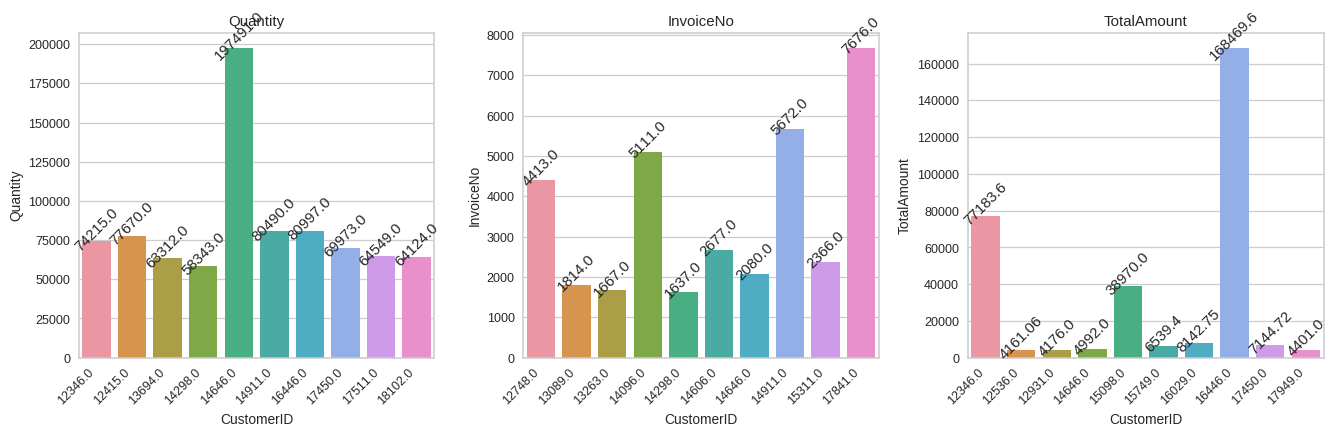

In [ ]:
#Getting those customer which purchased in bulk quantity, frequntly, and the highest purchasing power
customers = df.groupby(['CustomerID']).agg({'Quantity':'sum','InvoiceNo':'count','TotalAmount':'max'}).reset_index()

plt.figure(figsize=(15,5),dpi=90)
for n,i in enumerate(['Quantity','InvoiceNo','TotalAmount']):
  plt.subplot(1,3,n+1)
  plt.xticks(rotation=45,ha='right')
  plt.title(f'{i}')
  df0 = sns.barplot(data=customers.sort_values(i,ascending=False).head(10),x="CustomerID",y=i)
  for i in df0.patches:
    df0.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10),rotation=45, textcoords = 'offset points')
  plt.tight_layout();

Q. What insights we get from above chart?


*   top 10 customers who purchased in bulky quantity: 12346, 12415, 13694, 14298, 14646, 14911, 16446, 17450, 17511, 18102
*   top 10 customers who generated highest invoices: 12748, 13089, 13263, 14096, 14298, 14606, 14646, 14911, 15311, 17841

*   top 10 customers who purchased highest amount of products: 16446, 12346, 15098, 12536, 12931, 14646, 15749, 16029, 17450, 17949






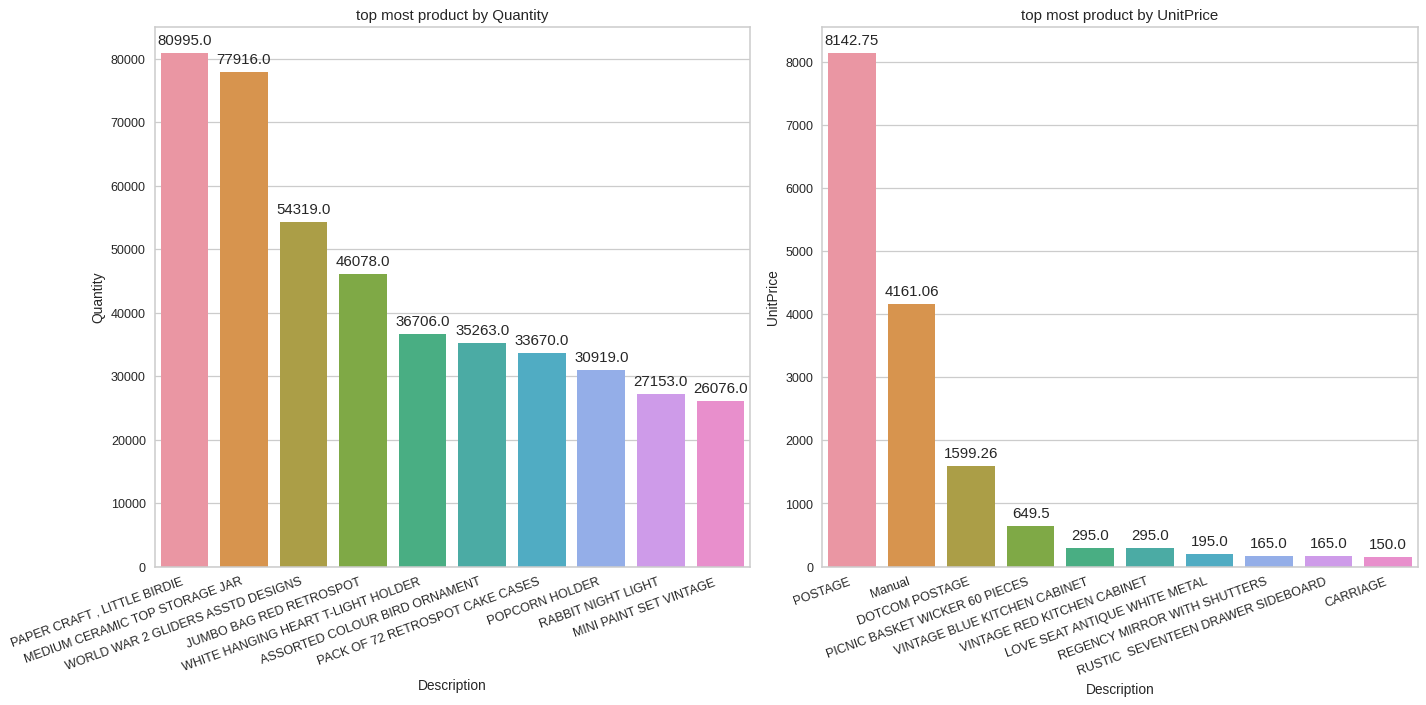

In [ ]:
# Getting the product which are purchased in bulk and in minimum bulk
Price = df.groupby(['Description','StockCode']).agg({'Quantity':'sum','UnitPrice':'max'}).reset_index()

plt.figure(figsize=(16,8),dpi=90)
for n,i in enumerate(['Quantity','UnitPrice']):
  plt.subplot(1,2,n+1)
  plt.xticks(rotation=20,ha='right')
  plt.title(f'top most product by {i}')
  df0 = sns.barplot(data=Price.sort_values(i,ascending=False).head(10),x="Description",y=i)
  for i in df0.patches:
    df0.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  plt.tight_layout();

What insights we get from above chart?


*   top 10 products which are purchased in bulk: Paper craft, medium ceramic top storage jar, jumbo bag red retrospot, etc
*   top 10 products which have highest price: Postage, Manual, Dotcom Postage, Picnic basket wicker 60 pieces, vintage red kitchen cabinet, etc.



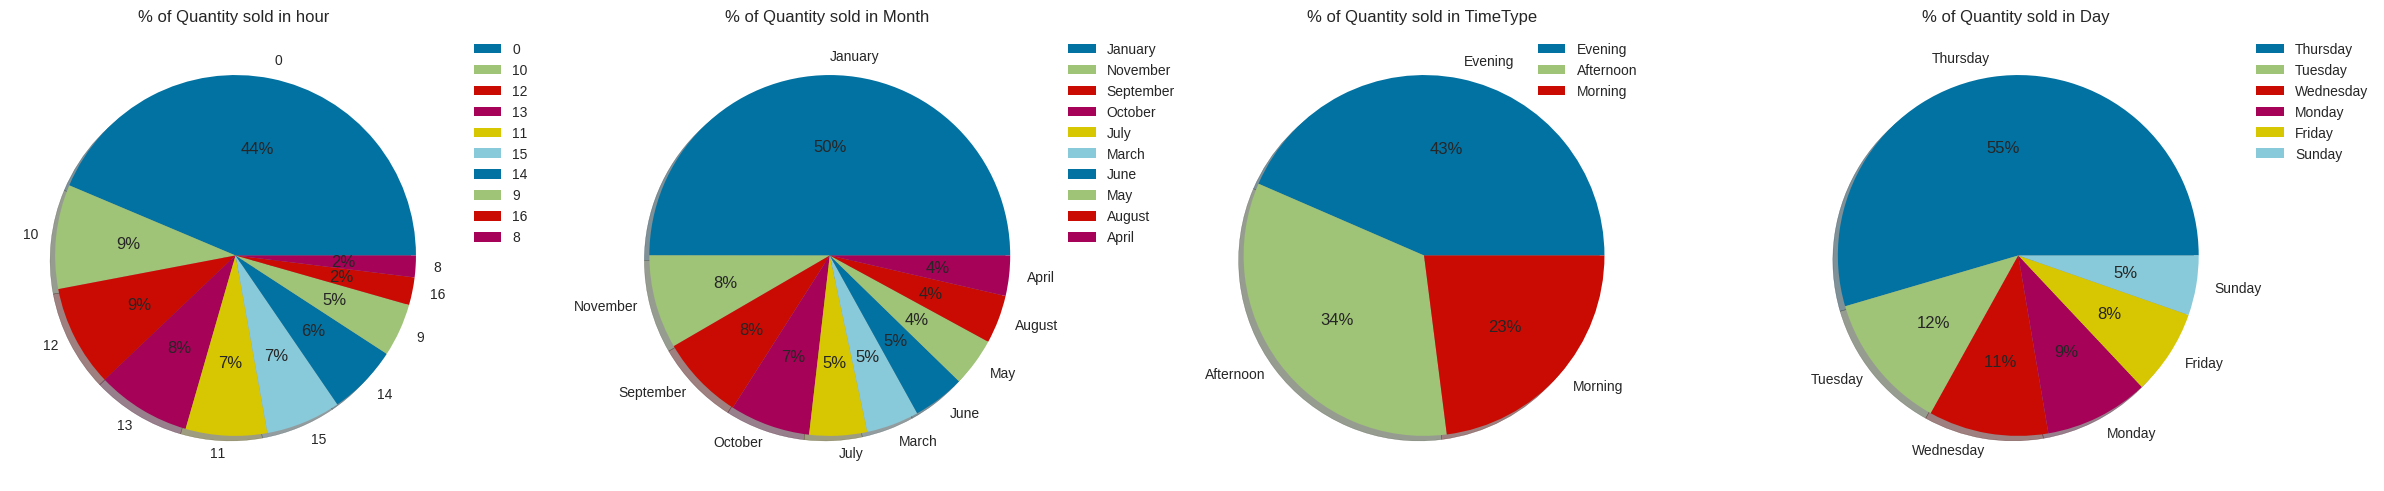

In [ ]:
# Getting the % of quantity of product purchased in hour, month, timetype, days
plt.figure(figsize=(24,6))
for n,i in enumerate(['hour','Month','TimeType','Day']):
    plt.subplot(1,4,n+1)
    group = df.groupby([i]).agg({'Quantity':'sum','InvoiceNo':'count'}).reset_index().sort_values('Quantity',ascending=False).head(10)
    # plotting data on chart
    plt.pie(group['Quantity'],labels=group[i],autopct='%.0f%%',shadow=True)
    plt.title(f'% of Quantity sold in {i} ')
    plt.legend(group[i],loc='best',bbox_to_anchor=(1,1))
    plt.tight_layout();



Q. What insights we get from above piechart?

*   Highest % of quantity sold in 12th, 10th, 13th, 11th, 14th Hour and least in 17th, 3rd, 16th hour.most of retailer are active between 10 a.m. to 2 p.m.
*   Highest % of quantity sold in November, December, October, September. Since these months are near to christmas, many retailer buys in this month. least sold in April, January, February, March month.
*   Highest % of quantity sold in Afternoon, then in Morning.
*   Highest % of quantity sold on Thursday, Tuesday, Wednesday, Friday. On saturday no one purchased. we can say that Saturday is a Holiday for them.

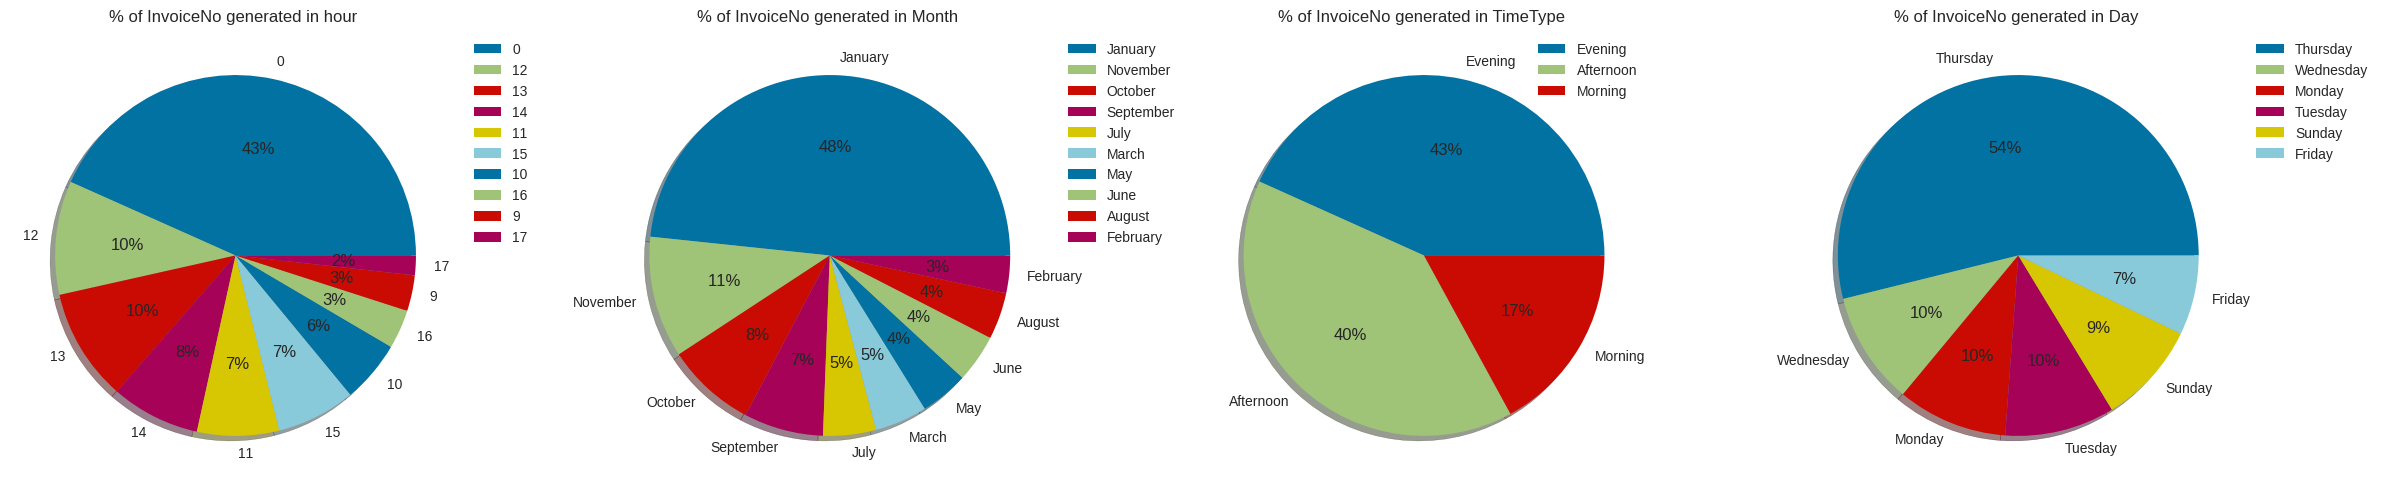

In [ ]:
# Getting the % of Invoices generated in hour, month, timetype, days
plt.figure(figsize=(24,6))
for n,i in enumerate(['hour','Month','TimeType','Day']):
    plt.subplot(1,4,n+1)
    group = df.groupby([i]).agg({'Quantity':'sum','InvoiceNo':'count'}).reset_index().sort_values('InvoiceNo',ascending=False).head(10)
    # plotting data on chart
    plt.pie(group['InvoiceNo'],labels=group[i],autopct='%.0f%%',shadow=True)
    plt.title(f'% of InvoiceNo generated in {i} ')
    plt.legend(group[i],loc='best',bbox_to_anchor=(1,1))
    plt.tight_layout();

**Q. What insights we get from above piechart?**
* Highest invoices generated in 12th, 13th, 14th, 11th Hour and least in 8th, 17th, 9th, 16th hour.
* Highest invoices generated in November, December, October, September. Since these months are near to christmas, many retailer buys in this month. least sold in January, February, April month.
* Highest invoices generated in Afternoon, then in Morning.
* Highest invoices generated on Thursday, Tuesday, Wednesday, Monday. On saturday no one purchased. we can say that Saturday is a non working day for them.

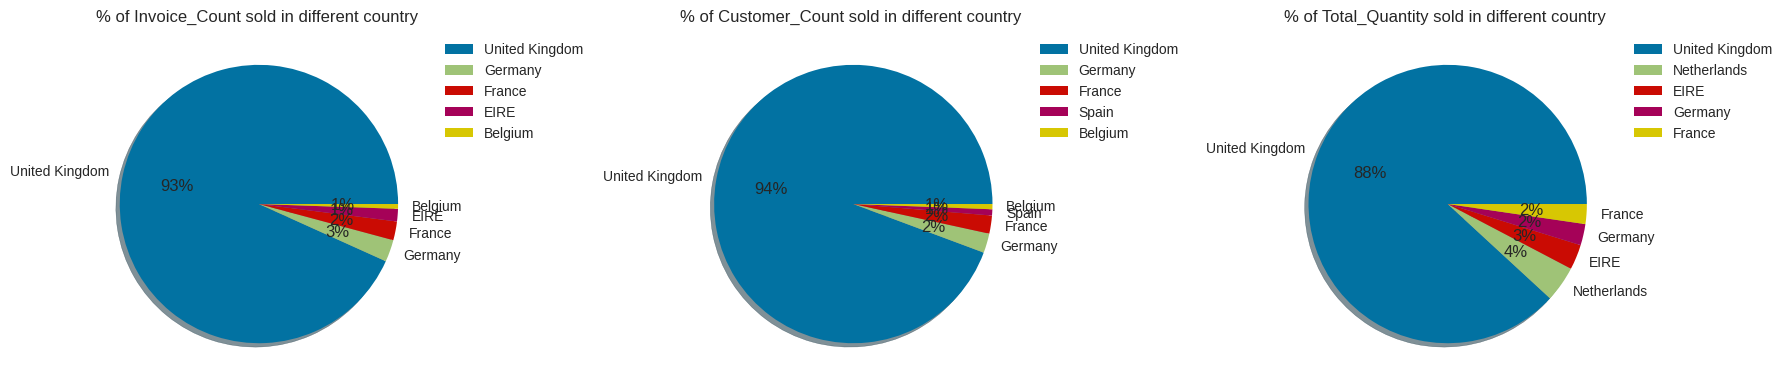

In [ ]:
# Most orders placed are from these countries
# Most customers are from these countries
# Countrywise total item purchases
country = df.groupby("Country").agg({'InvoiceNo':'nunique','CustomerID':'nunique','Quantity':'sum'}).reset_index()
country.rename(columns={'InvoiceNo': 'Invoice_Count','CustomerID': 'Customer_Count','Quantity':'Total_Quantity'}, inplace=True)

# Getting the % of Invoices, customers, and quantity by country
plt.figure(figsize=(18,6))
for n,i in enumerate(['Invoice_Count','Customer_Count','Total_Quantity']):
    plt.subplot(1,3,n+1)
    df1 = country.sort_values(i,ascending=False).head()
    # plotting data on chart
    plt.pie(df1[i],labels=df1['Country'],autopct='%.0f%%',shadow=True)
    plt.title(f'% of {i} sold in different country ')
    plt.legend(df1['Country'],loc='best',bbox_to_anchor=(1,1))
    plt.tight_layout();


* **Highest invoices is generated from United Kingdom.**
* **United Kingdom has the highest number of customers.**
* **Orders with mass quantity are placed from the United Kingdom.**

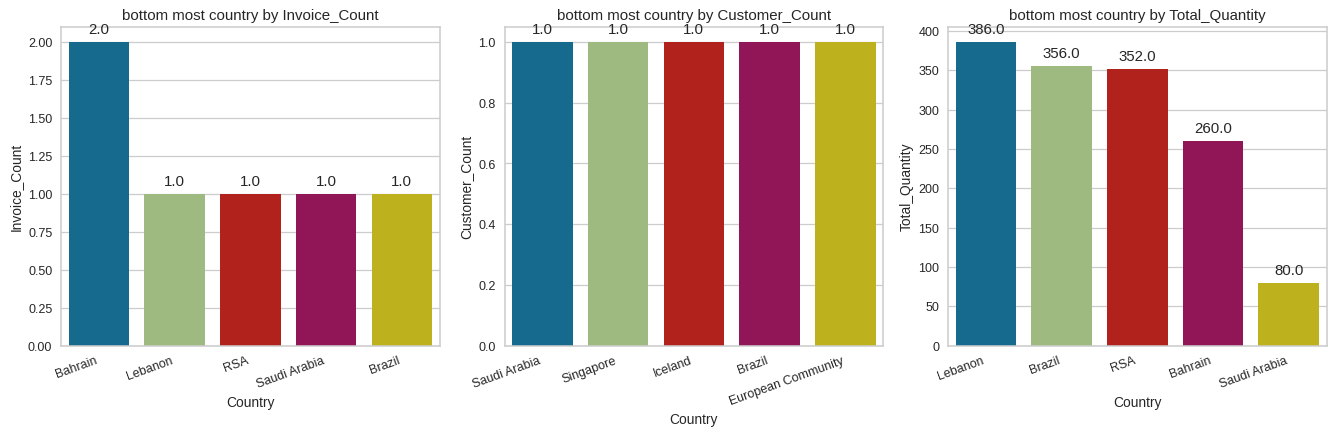

In [ ]:
# Least orders placed are from these countries
# Least customers are from these countries
# Countrywise least total item purchases
plt.figure(figsize=(15,5),dpi=90)
for n,i in enumerate(['Invoice_Count','Customer_Count','Total_Quantity']):
  plt.subplot(1,3,n+1)
  plt.xticks(rotation=20,ha='right')
  plt.title(f'bottom most country by {i}')
  df2 = sns.barplot(data=country.sort_values(i,ascending=False).tail(),x="Country",y=i)
  for i in df2.patches:
    df2.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  plt.tight_layout();

* **Least invoices is generated from Brazil, Saudi Arabia, RSA, Lebonan.**
* **European Community, Brazil, Iceland, Singapore, Saudi Arabia has the least number of customers.**
* **Orders with least quantity are placed from the Saudi Arabia, Bahrain, RSA, Brazil, Lebanon.**

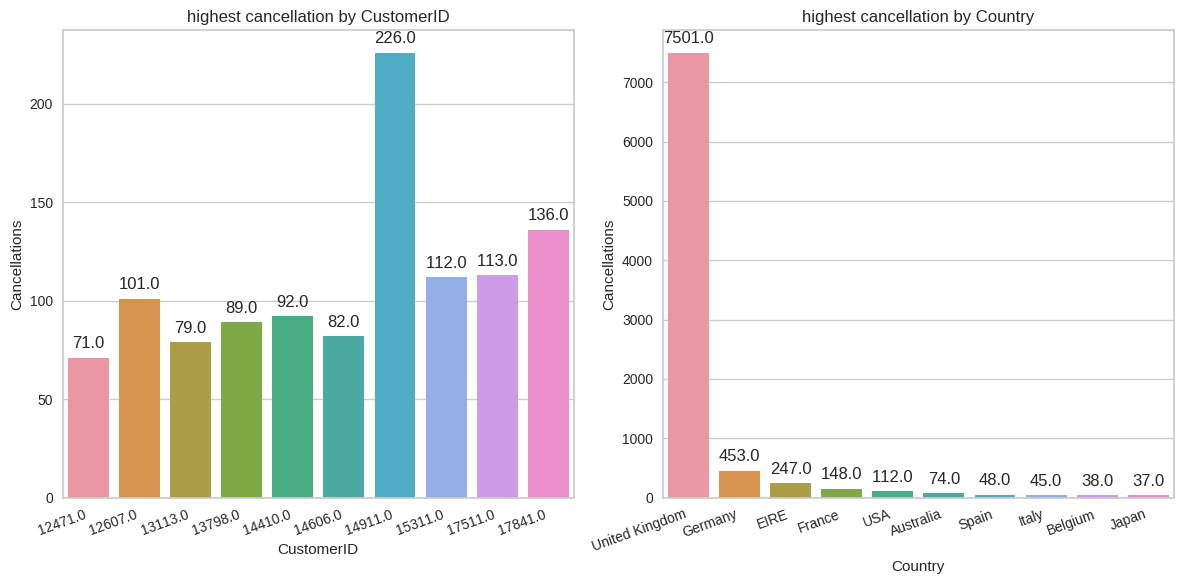

In [ ]:
# Checking the number of cancellations by each customer.
plt.figure(figsize=(12,6))
for n,i in enumerate(['CustomerID','Country']):
  customer_cancellations = cancellations.groupby(i).count()['InvoiceNo'].reset_index().sort_values("InvoiceNo",ascending=False)
  customer_cancellations.rename(columns={'InvoiceNo': 'Cancellations'}, inplace=True)
  plt.subplot(1,2,n+1)
  plt.xticks(rotation=20,ha='right')
  plt.title(f'highest cancellation by {i}')
  df3 = sns.barplot(data=customer_cancellations.head(10),x=i,y='Cancellations')
  for i in df3.patches:
    df3.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  plt.tight_layout();


**Q. What insights we get from above piechart?**
* Most of products are cancelled from above countries: United Kingdom, Germany, EIRE, France, USA, Australia, Spain, etc.
* Customer who cancelled highest number of products: 14911, 17841, 17511, 15311, 12607, etc.

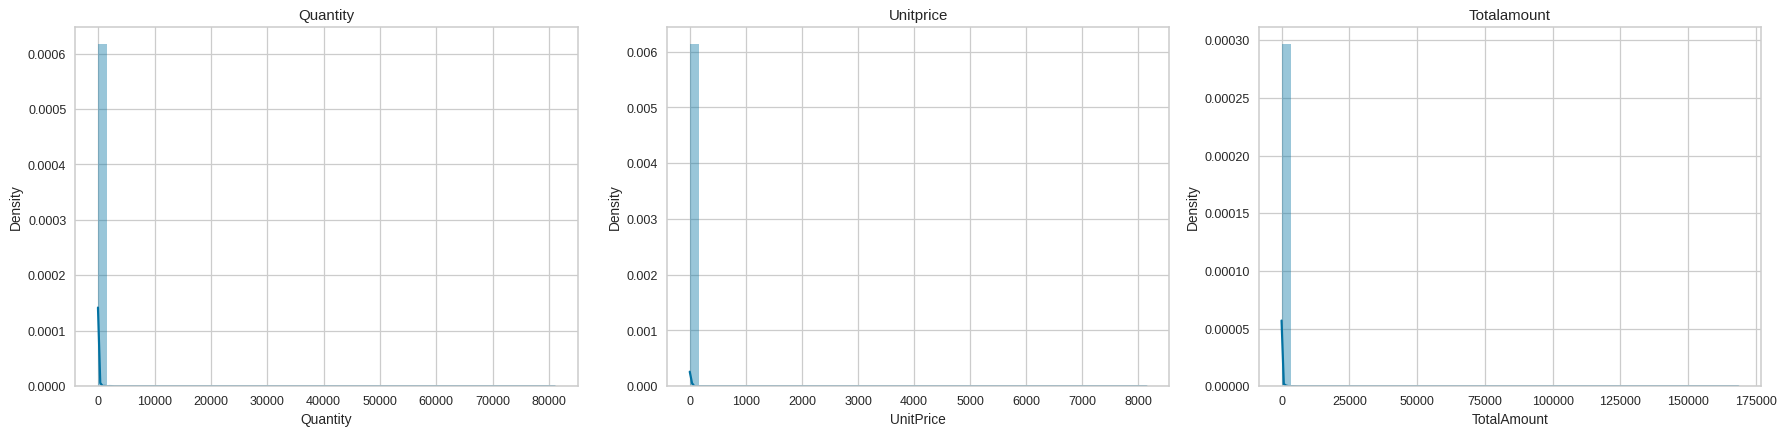

In [ ]:
# Visualizing the distributions.
target = ['Quantity','UnitPrice','TotalAmount']
plt.figure(figsize=(20,5), dpi=90)
for n,col in enumerate(target):
  plt.subplot(1, 3, n+1)
  sns.distplot(df[col])
  plt.title(col.title())
  plt.tight_layout()


Observation:
1. It shows a positively skewed distribution because most of the values are clustered around the left side of the distribution while the right tail of the distribution is longer, which means mean>median>mode
2. For symmetric graph mean=median=mode.

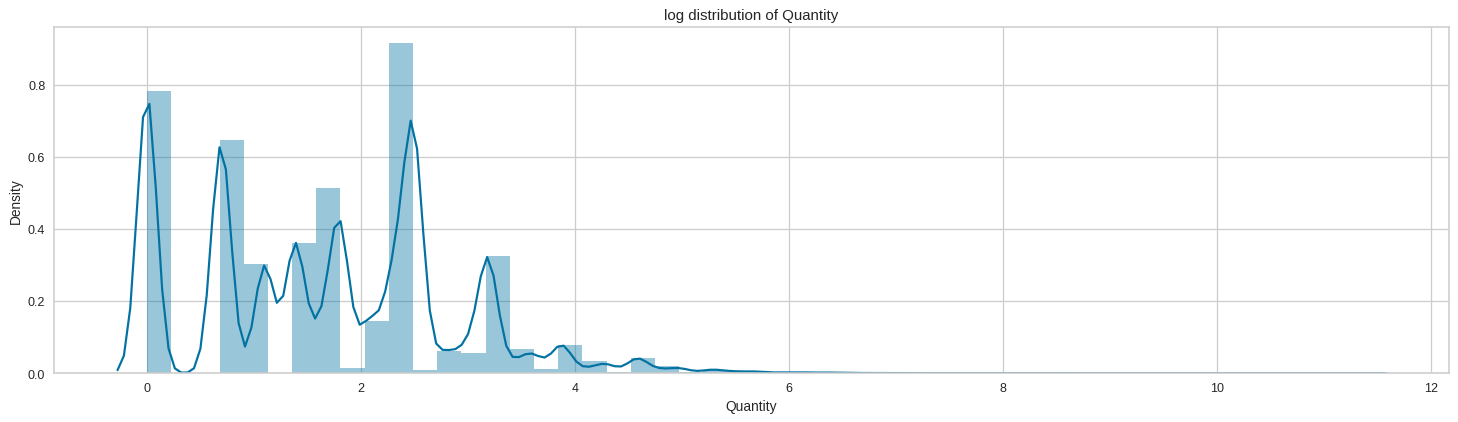

In [ ]:
# Visualizing the distributions after log transformation of Quantity
plt.figure(figsize=(20,5), dpi=90)
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']))
plt.show();

1. Since Most of the Customers are wholesalers we cannot group customers based on the demographic group like age, gender, income and behavioral and psycho-graphic group Because Our Customers purchase bunch of goods from us and sell it to individual customers.
2. We only need to deal issues and make clusters related to B2B Business to Business instead of B2C i.e. Direct from Business to Customers
People who purchase products from us, do not utilize it. They sell it to individual customers(B2C) or sell all products to another stores (B2B)
3. Due to all these reasons we need to cluster customers according to there activities i.e
  1. R- Recency
  2. F- Frequency
  3. M- Monetary

#**RFM Modelling**


> **Indented block**



Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. **The RFM model is based on three quantitative factors:**
* Recency: How recently a customer has made a purchase.
* Frequency: How often a customer makes a purchase.
* Monetary Value: How much money a customer spends on purchases.

**Calculating RFM scores**

The number is typically 3 or 5. If you decide to code each RFM attribute into 3 categories, you'll end up with 27 different coding combinations ranging from a high of 333 to a low of 111. Generally speaking, **the higher the RFM score, the more valuable the customer.**


In [ ]:

# Assuming df is your DataFrame with the "InvoiceDate" column

# Convert "InvoiceDate" to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Adding 1 day to the Last Invoice date to set as Latest date for reference
LatestDate = df["InvoiceDate"].max() + timedelta(days=1)

# Convert LatestDate to a string
LatestDate_str = LatestDate.strftime('%Y-%m-%d')

# Creating a new dataframe to calculate Recency, Frequency, and Monetary scores for each customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (LatestDate - x.max()).days,  # how many days ago the customer purchased
    'InvoiceNo': 'count',  # how often the customer purchased
    'TotalAmount': 'sum'  # how much money the customer spends on purchase
})

# Renaming the columns
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalAmount': 'Monetary'}, inplace=True)

# Checking top 5 rows
result_df = rfm.reset_index()
print(result_df.head())


   CustomerID  Recency  Frequency  Monetary
0     12346.0      317          1  77183.60
1     12347.0       31        182   4310.00
2     12348.0       67         31   1797.24
3     12349.0       10         73   1757.55
4     12350.0    15309         17    334.40


Interpretation:
1. Recency: How recent a customer made a purchase.
2. Frequency: How often a customer makes a purchase.
3. Monetary: How much money a customer spends.

In [ ]:
# Calculating R, F and M scores by splitting Recency, Frequency	and Monetary based on quantiles
rfm['R'] = pd.qcut(rfm['Recency'], q=4, labels=[4,3,2,1]).astype(int)
rfm['F'] = pd.qcut(rfm['Frequency'], q=4, labels=[1,2,3,4]).astype(int)
rfm['M'] = pd.qcut(rfm['Monetary'], q=4, labels=[1,2,3,4]).astype(int)

# Finding the RFM Group for each customer by combining the factors R,Fand M
rfm['RFM'] = 100*rfm['R'] + 10*rfm['F'] + rfm['M']

# Finding the RFM Score for each customer by adding the factors R,Fand M
rfm['RFM_Score'] = rfm['R'] + rfm['F'] + rfm['M']

Interpretation:
1. If the RFM of any customer is 444. His Recency is good, frequency is more and Monetary is more. So, he is the best customer.
2. If the RFM of any customer is 111. His Recency is low, frequency is low and Monetary is low. So, he is the churning customer.
3. If the RFM of any customer is 144. He purchased a long time ago but buys frequently and spends more. And so on.
4. Like this we can come up with number of segments for all combinations of R,F and M base on our usecase. Higher the RFM score, more valuable the customer is.

In [ ]:
# Handling the zeroes in the dataframe to avoid error in transformations
rfm.replace(0.0,1,inplace=True)

# Applying Log transformation on columns for smoothening the distribution
rfm['Recency_Log']   = rfm['Recency'].apply(np.log)
rfm['Frequency_Log'] = rfm['Frequency'].apply(np.log)
rfm['Monetary_Log']  = rfm['Monetary'].apply(np.log)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,Recency_Log,Frequency_Log,Monetary_Log
CustomerID,,,,,,,,,,,
12346.0,317,1,77183.60,1,1,4,114,6,5.758902,0.000000,11.253942
12347.0,31,182,4310.00,3,4,4,344,11,3.433987,5.204007,8.368693
12348.0,67,31,1797.24,3,2,4,324,9,4.204693,3.433987,7.494007
12349.0,10,73,1757.55,4,3,4,434,11,2.302585,4.290459,7.471676
12350.0,15309,17,334.40,1,1,2,112,4,9.636196,2.833213,5.812338


In [ ]:
# Checking Descriptive Stats
rfm.describe().round(2)

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,Recency_Log,Frequency_Log,Monetary_Log
count,4339.00,4339.00,4339.00,4339.00,4339.00,4339.00,4339.00,4339.00,4339.00,4339.00,4339.00
mean,3101.25,90.51,2048.22,2.50,2.49,2.50,277.71,7.49,4.89,3.67,6.58
std,6062.07,225.52,8984.25,1.12,1.12,1.12,117.53,2.78,2.72,1.32,1.27
min,1.00,1.00,1.00,1.00,1.00,1.00,111.00,3.00,0.00,0.00,0.00
25%,16.00,17.00,306.46,2.00,1.00,1.50,211.00,5.00,2.77,2.83,5.73
50%,79.00,41.00,668.56,3.00,2.00,2.00,311.00,7.00,4.37,3.71,6.51
75%,281.00,98.00,1660.32,4.00,3.00,3.50,411.00,10.00,5.64,4.58,7.41
max,15309.00,7676.00,280206.02,4.00,4.00,4.00,444.00,12.00,9.64,8.95,12.54


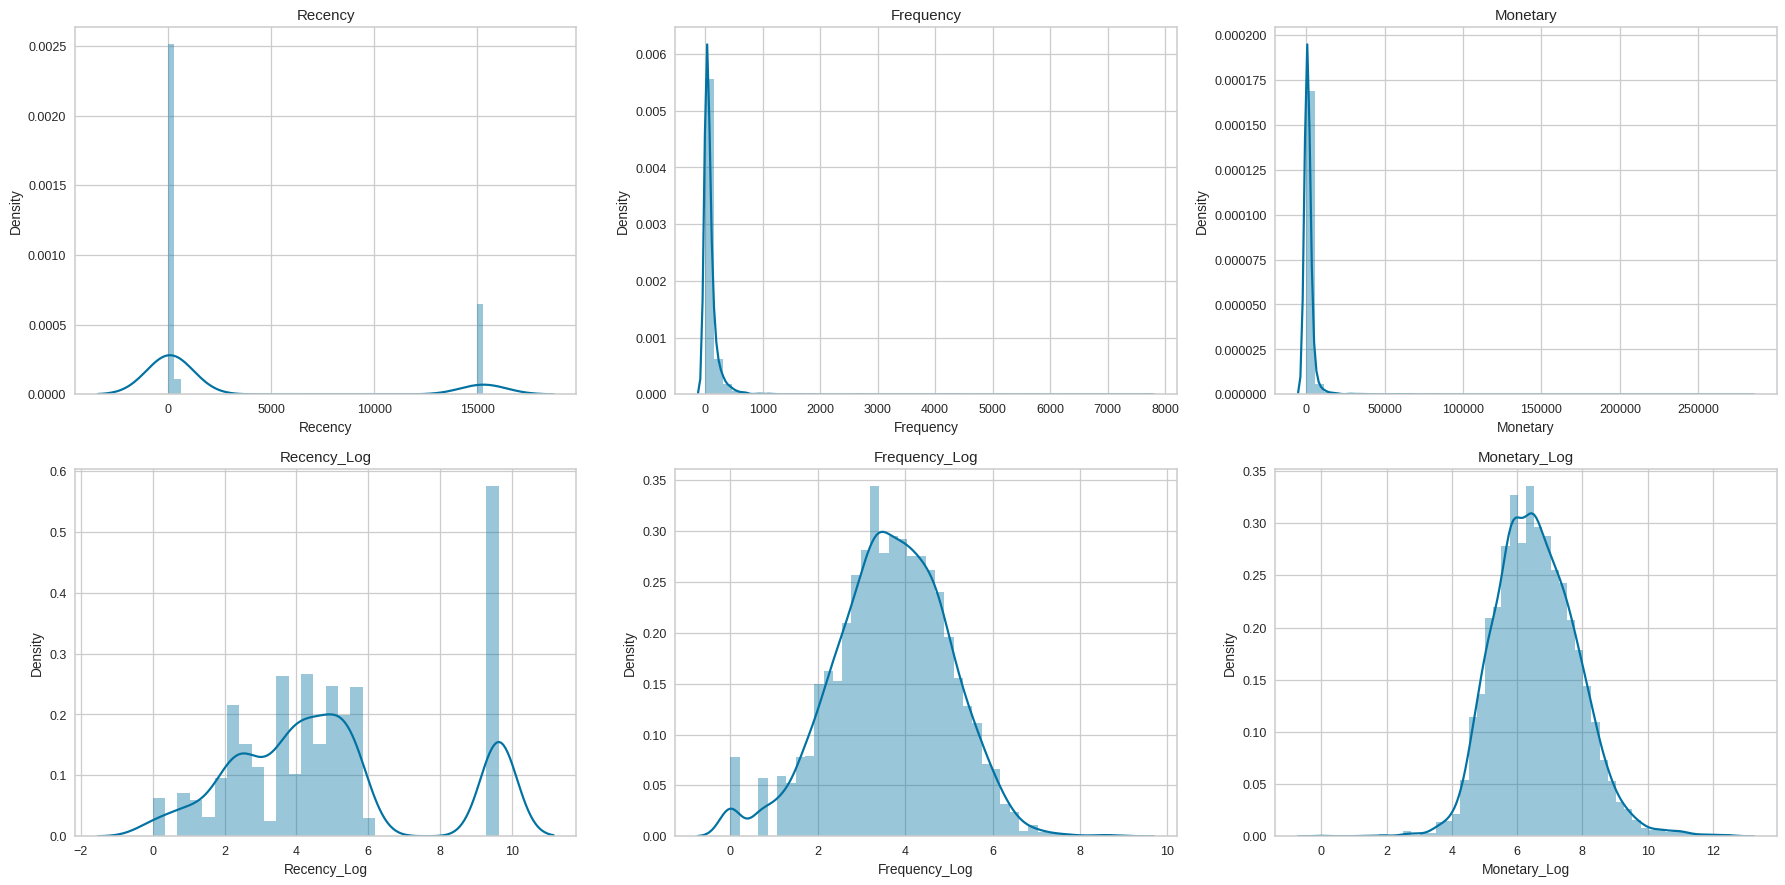

In [ ]:
# Visualizing the distributions before and after log transformation.
target = ['Recency', 'Frequency',	'Monetary', 'Recency_Log', 'Frequency_Log', 'Monetary_Log']
plt.figure(figsize=(20,10), dpi=90)
for n,col in enumerate(target):
  plt.subplot(2, 3, n+1)
  sns.distplot(rfm[col])
  plt.title(col.title())
  plt.tight_layout()

Observations:
1. Earlier the distributions of Recency, Frequency and Monetary columns were positively skewed but after applying log transformation, the distributions appear to be symmetrical and normally distributed.
2. It will be more suitable to use the transformed features for better visualisation of clusters.

# **Clustering**


> Indented block



In [ ]:
# Defining X Variables
X = rfm[['Recency_Log','Frequency_Log','Monetary_Log']]
X = StandardScaler().fit_transform(X)

In [ ]:
# Initializing an empty dictionary to store the stats and summary for all clusters
conclusion={}

# Definin a function to remove the outliers
def cap_outliers(col,overlap_supress):
  '''
    Takes a column and removes the outliers based on the overlap_supress value
    col: column to be cleaned
    overlap_supress: value to be used to remove the outliers
    Type:
    col: pandas.Series
    overlap_supress: float

    Returns:Capped column with outliers removed
  '''
  condition1=col < col.quantile(1-overlap_supress)
  condition2=col > col.quantile(overlap_supress)
  return col[condition1 & condition2]

# Function for displaying the stats of Recency, Frequency and Monetary for each group
def cluster_stats(data, segment_name):
  '''
    Type:data: pandas.DataFrame
    Type:segment_name: str
    Returns: pandas.DataFrame
    Features:This function prints the mean median and count of Recency, Frequency and Monetary for each group
    This function prints 0.25th and 0.75th Quantile of Recency, Frequency and Monetary for each group
  '''
    # Storing the mean median and count of Recency, Frequency and Monetary for each group
  stats = data[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg(['mean','median']).round(2)
  stats['Count'] = data[segment_name].value_counts()

  # Storing 0.25th and 0.75th Quantile of Recency, Frequency and Monetary for each group
  summary = data[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg({
          "Recency"   :lambda x : f'{int(x.quantile(0.25))} to {int(x.quantile(0.75))} days ago',
          "Frequency" :lambda x : f"Bought {int(x.quantile(0.25))} to {int(x.quantile(0.75))} times",
          "Monetary"  :lambda x : f"Spent around {int(x.quantile(0.25))} to {int(x.quantile(0.75))} Sterling"})

  # Changing the name for the columns
  stats.columns = [f'{i}_{j}' for i, j in stats.columns]
  summary.columns=["Last_visited",'Purchase_frequency',"Money_spent"]

  return stats, summary

# Defining a function for plotting clusters for Visualization
def plots_stats_summary(y, segment_name, title, overlap_supress=0.2):
  '''
  Arguments:
    Type:y: pandas.Series
    Type:title: str
    Type:segment_name: str
    Type:overlap_supress: float
  Returns: Array of DataFrames
  features:This function plots the clusters for the given data and returns the dataframes for the clusters with conclusions and stats
  '''
  rfm[segment_name] = y                                               # Copying segment values to main data frame
  groups = sorted(rfm[segment_name].unique())                         # store legends for features.
  # Calling the cluster_stats Function and saving outputs into variable
  stats, summary = cluster_stats(rfm,segment_name)

  # PART 1 : Visyualizing the scatter plots for all clusters
  plt.figure(figsize = (6, 6), dpi=90)                               # Setting the size of the figure
  ax = plt.axes(projection ="3d")                                     # initializing axes
  ax.set_xlabel('Recency')                        # Setting X label
  ax.set_ylabel('Frequency')                      # Setting Y label
  ax.set_zlabel('Monetary')                       # Setting Z label
  ax.set_title(title)                             # Setting main title
  ax = ax.scatter(X[:, 0], X[:, 1], X[:, 2] ,c=y, cmap='viridis')     # Plotting scatter plot in 3 dimensions
  plt.legend(*ax.legend_elements(),prop={'size': 15})                 # positioning legend

  # PART 2 : Plotting the distribution
  fig,ax = plt.subplots(3,1,figsize=(10,8), dpi=90)                  # Setting the size of the figure
  # Running a for loop for iterating through the number of clusters
  for i in groups:
    # Running a for loop for iterating through columns
    for index, col in enumerate(["Recency", "Frequency", "Monetary"]):
      # Plotting distributions of Recency, Frequency and Monetary
      sns.distplot(cap_outliers(rfm[rfm[segment_name]==i][col], overlap_supress),ax=ax[index])
      ax[index].set_title(f'{col} Distribution')  # Setting the main title
      ax[index].legend(groups)                      # Assiging legends for all the axes
  plt.tight_layout()

  # PART 3 : # Displaying the stats and summary
  # Displaying the mean median and count of Recency, Frequency and Monetary for each group
  print('\n\nDisplaying the mean median and count of Recency, Frequency and Monetary for each group with the description:\n')
  display(stats.reset_index().style.hide_index())
  display(summary.reset_index().style.hide_index())

  return  summary

# **Binary RFM score**


> Indented block





Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



Binning,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
1,8159.120000,15309.000000,15.360000,13.000000,258.180000,216.260000,1254
2,2593.940000,129.500000,33.320000,28.500000,952.520000,482.930000,958
3,550.010000,49.000000,85.500000,66.000000,1478.530000,1097.980000,1317
4,19.030000,11.000000,282.670000,187.000000,7041.620000,3213.220000,810


Binning,Last_visited,Purchase_frequency,Money_spent
1,196 to 15309 days ago,Bought 7 to 21 times,Spent around 138 to 328 Sterling
2,43 to 260 days ago,Bought 18 to 41 times,Spent around 330 to 707 Sterling
3,14 to 128 days ago,Bought 45 to 101 times,Spent around 742 to 1657 Sterling
4,4 to 31 days ago,Bought 123 to 301 times,Spent around 2089 to 5459 Sterling


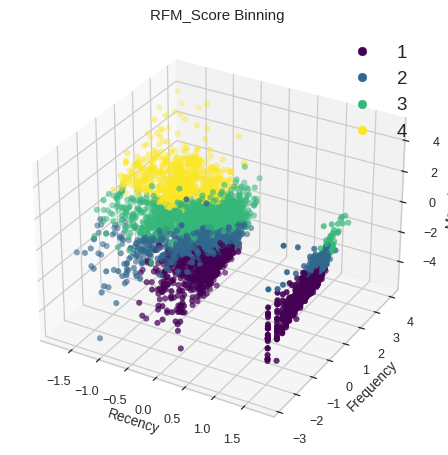

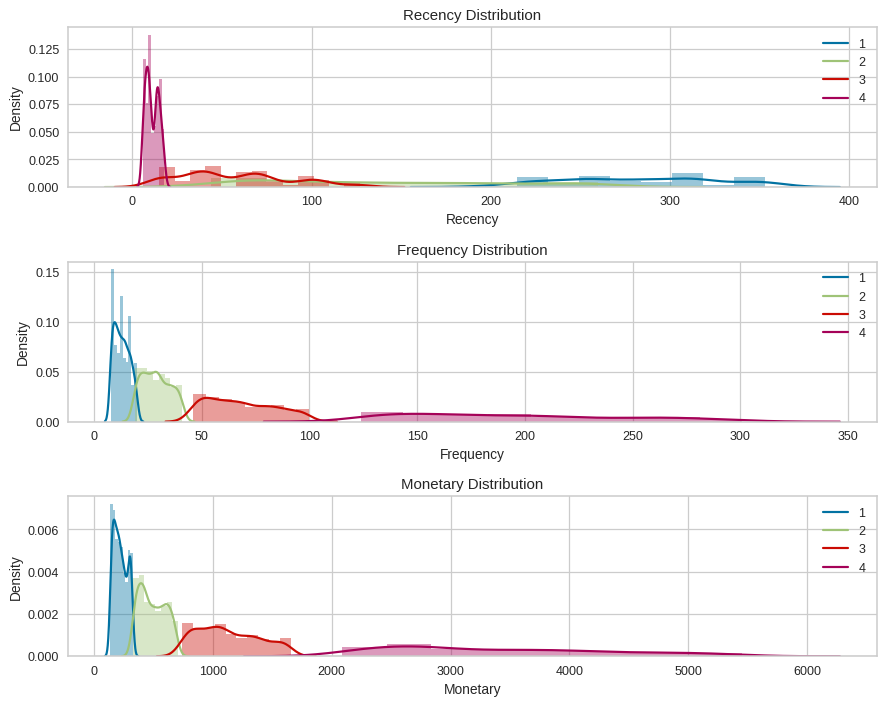

In [ ]:
# Splitting RFM_Score in 4 bins based on quantiles
y = pd.qcut(rfm['RFM_Score'], q=4, labels=[1,2,3,4]).astype(int)

# Plotting Segments for Visualization
title = 'RFM_Score Binning'
segment_name = 'Binning'
overlap_supress = 0.25
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

# **Quantile Based Clustering**


> Indented block





Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



QuantileCut,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
1,10315.130000,15309.000000,28.850000,16.000000,560.530000,289.560000,1284
2,155.220000,154.000000,61.210000,37.000000,1323.480000,658.880000,1003
3,45.980000,43.000000,94.710000,55.500000,1975.970000,980.790000,1040
4,8.080000,8.000000,193.480000,101.000000,4728.300000,1629.080000,1012


QuantileCut,Last_visited,Purchase_frequency,Money_spent
1,311 to 15309 days ago,Bought 8 to 33 times,Spent around 155 to 505 Sterling
2,104 to 202 days ago,Bought 19 to 76 times,Spent around 339 to 1339 Sterling
3,34 to 65 days ago,Bought 27 to 121 times,Spent around 465 to 2044 Sterling
4,3 to 13 days ago,Bought 49 to 208 times,Spent around 745 to 3809 Sterling


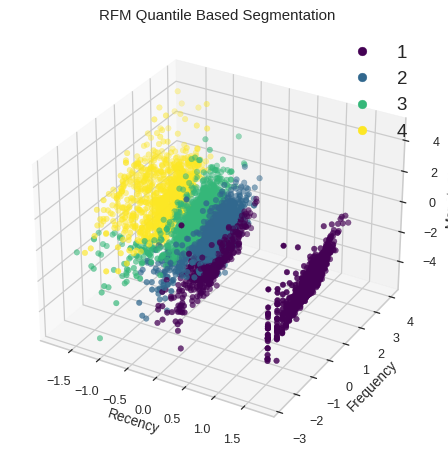

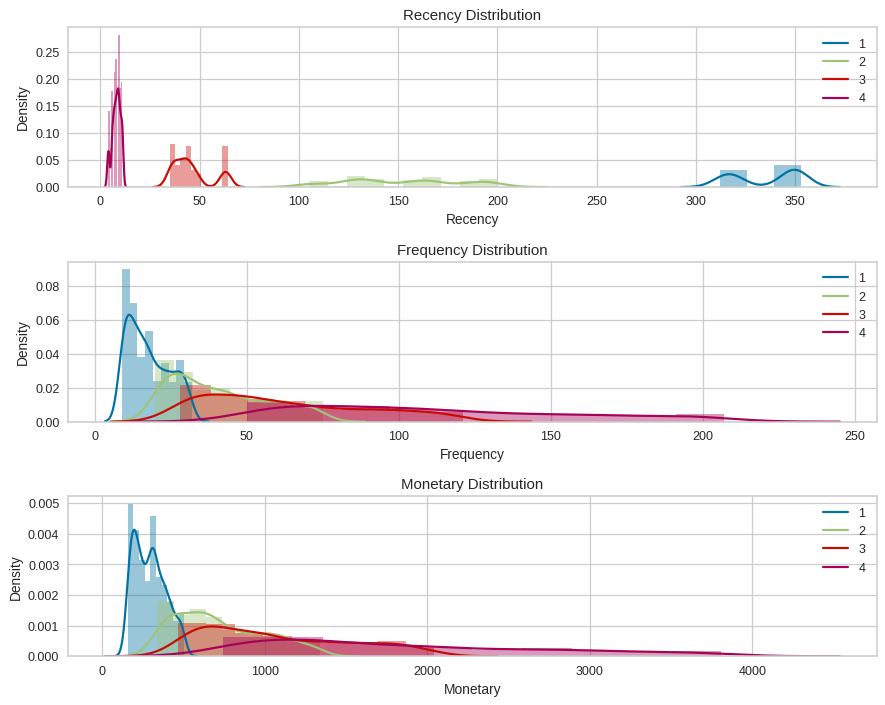

In [ ]:
# Splitting RFM in 4 segments based on quantiles to obtain segments
y = pd.qcut(rfm['RFM'], q=4, labels=[1,2,3,4]).astype(int)

# Plotting Segments for Visualization
title = 'RFM Quantile Based Segmentation'
segment_name = 'QuantileCut'
overlap_supress = 0.25
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

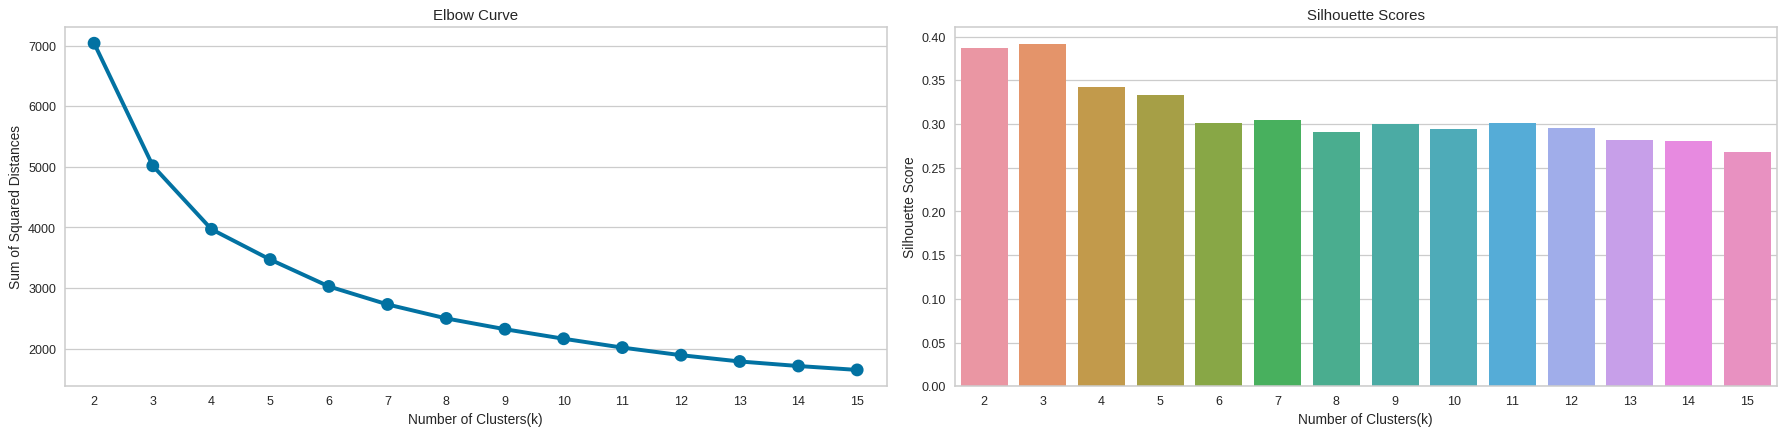

In [ ]:
# Storing sum of squared distances and Silhouette Scores for each value of k in k means clusterer
ssd,score = [],[]
# Setting figure Size
plt.figure(figsize=(20,5), dpi=90)

# Initializing the list of clusters for tuning the best clusters
n_clusters = list(range(2,16))

# Running a for loop of Kmeans algorithm
for k in n_clusters:
    clusterer = KMeans(n_clusters = k, init= 'k-means++', max_iter= 1000)
    y_preds = clusterer.fit_predict(X)                                          # Fitting the model
    ssd.append(clusterer.inertia_)                                              # Appending the inertia
    score.append(silhouette_score(X, y_preds))                                  # Appending the silhoutte score

# Plotting Elbow curve to find optimal K
plt.subplot(1, 2, 1)                                                            #Initializing subplots
sns.pointplot(x=n_clusters, y=ssd)                                              # plotting point plot
plt.xlabel('Number of Clusters(k)')                                             # Setting x label
plt.ylabel('Sum of Squared Distances')                                          # Setting y label
plt.title('Elbow Curve')                                                        # Setting the title

# Silhouette Score v/s Number of Clusters
plt.subplot(1, 2, 2)                                                            #Initializing subplots
sns.barplot(x=n_clusters, y=score)                                              # plotting bar plot
plt.xlabel('Number of Clusters(k)')                                             # Setting x label
plt.ylabel('Silhouette Score')                                                  # Setting y label
plt.title('Silhouette Scores')                                                  # Setting the title
plt.tight_layout()

Observations:
1. From the Elbow curve 5 appears to be at the elbow and hence can be considered as the number of clusters. n_clusters=4 or 6 can also be considered based of the objective of segmentation.
2. If we go by maximum Silhouette Score as the criteria for selecting optimal number of clusters, then n_clusters=2 can be chosen.
3. If we look at both of the graphs at the same time to decide the optimal number of clusters, we can take the intersection of set of good n_clusters obtained from both the graphs. So 4 appears to be a good choice, having a decent Silhouette score as well as near the elbow of the elbow curve.

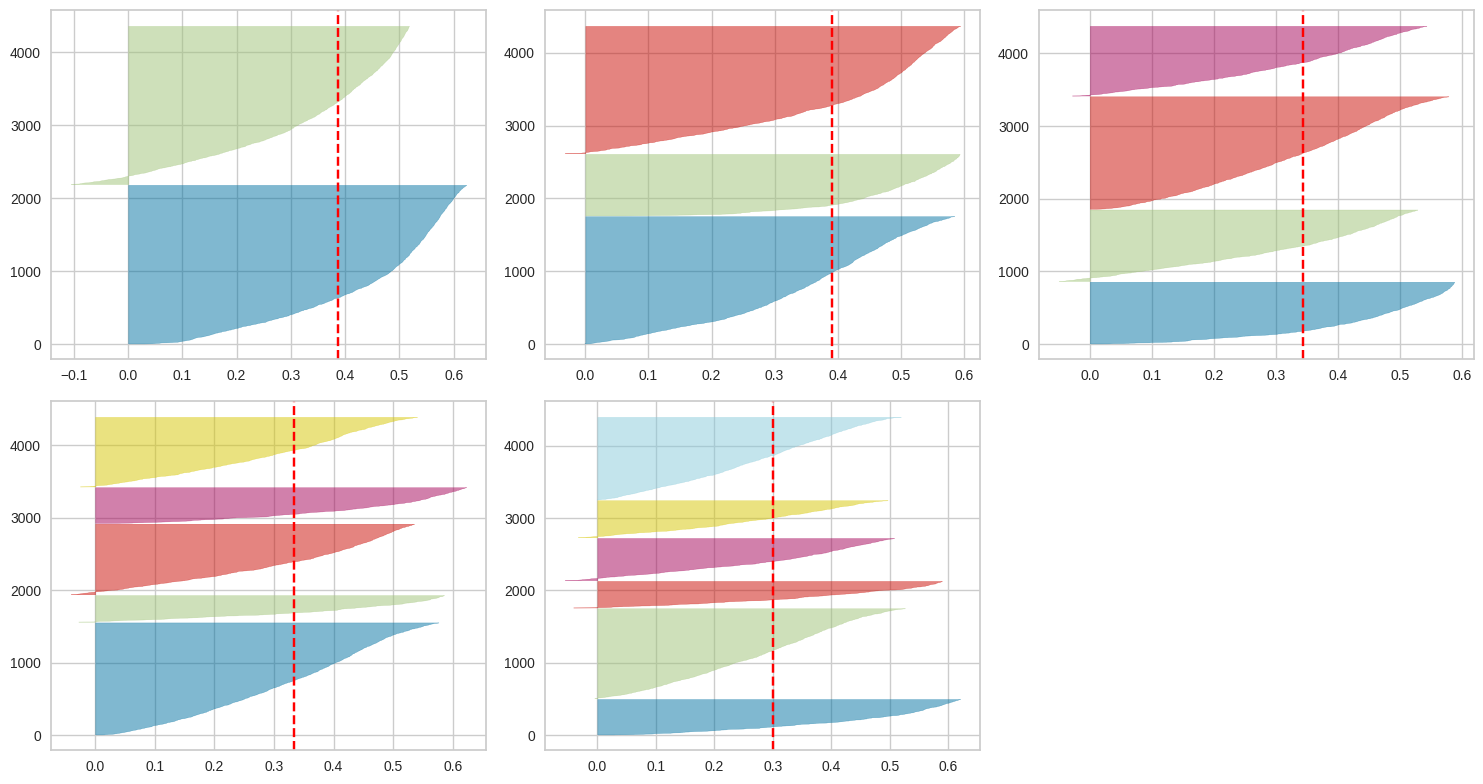

In [ ]:
# Visualizing the Silouette plots for the k-means clusters
plt.figure(figsize = (15,8))
for n,i in enumerate(range(2,7)):
    plt.subplot(2,3,n+1)
    kmeans=KMeans(i,init="k-means++")
    visualizer=SilhouetteVisualizer(kmeans,colors='yellowbrick')
    visualizer.fit(X)
    visualizer
    plt.tight_layout()

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



K-Means|2Cluster,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
0,220.880000,32.000000,158.370000,97.000000,3681.400000,1608.600000,2172
1,5988.260000,258.000000,22.490000,18.000000,411.270000,309.400000,2167


K-Means|2Cluster,Last_visited,Purchase_frequency,Money_spent
0,9 to 77 days ago,Bought 55 to 172 times,Spent around 925 to 3017 Sterling
1,97 to 15309 days ago,Bought 9 to 29 times,Spent around 176 to 487 Sterling


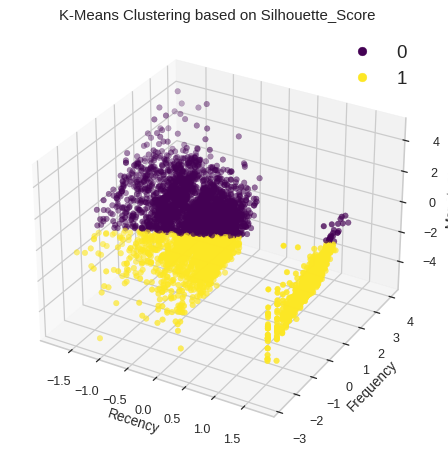

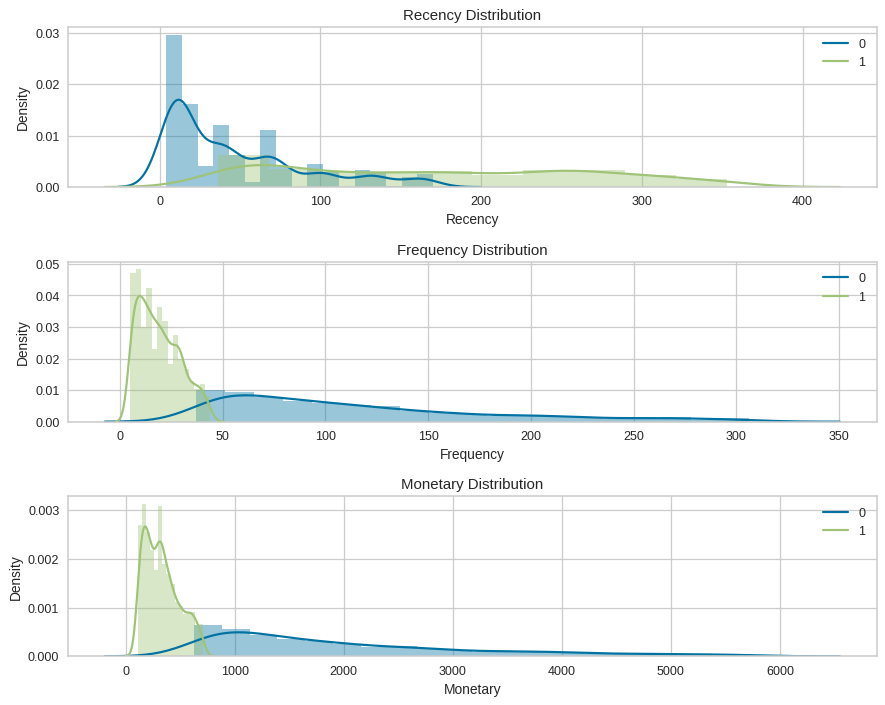

In [ ]:
# Fitting the model on n_clusters = 2 based on Silhouette_Score to visualise the segments.
kmc = KMeans(n_clusters=2,init="k-means++")             # Setting 2 Clusters
y = kmc.fit_predict(X)                                  # FItting the model
centers = kmc.cluster_centers_                          # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Silhouette_Score'  # Setting the title
segment_name = 'K-Means|2Cluster'
overlap_supress = 0.1
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



K-Means|5Cluster,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
0,40.850000,14.000000,266.770000,180.000000,6750.430000,3188.680000,972
1,136.300000,108.000000,13.830000,12.000000,294.250000,241.090000,965
2,15145.540000,15309.000000,8.880000,8.000000,210.980000,154.620000,368
3,96.670000,65.000000,60.600000,52.000000,1022.960000,833.950000,1540
4,15309.000000,15309.000000,47.570000,31.500000,787.130000,454.860000,494


K-Means|5Cluster,Last_visited,Purchase_frequency,Money_spent
0,7 to 62 days ago,Bought 119 to 292 times,Spent around 2242 to 5247 Sterling
1,42 to 228 days ago,Bought 7 to 19 times,Spent around 157 to 349 Sterling
2,15309 to 15309 days ago,Bought 5 to 12 times,Spent around 108 to 235 Sterling
3,16 to 158 days ago,Bought 35 to 77 times,Spent around 583 to 1246 Sterling
4,15309 to 15309 days ago,Bought 23 to 55 times,Spent around 327 to 727 Sterling


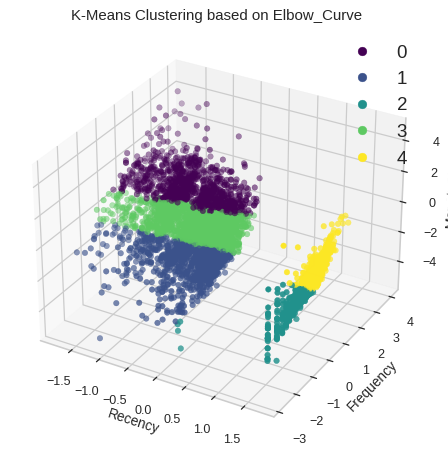

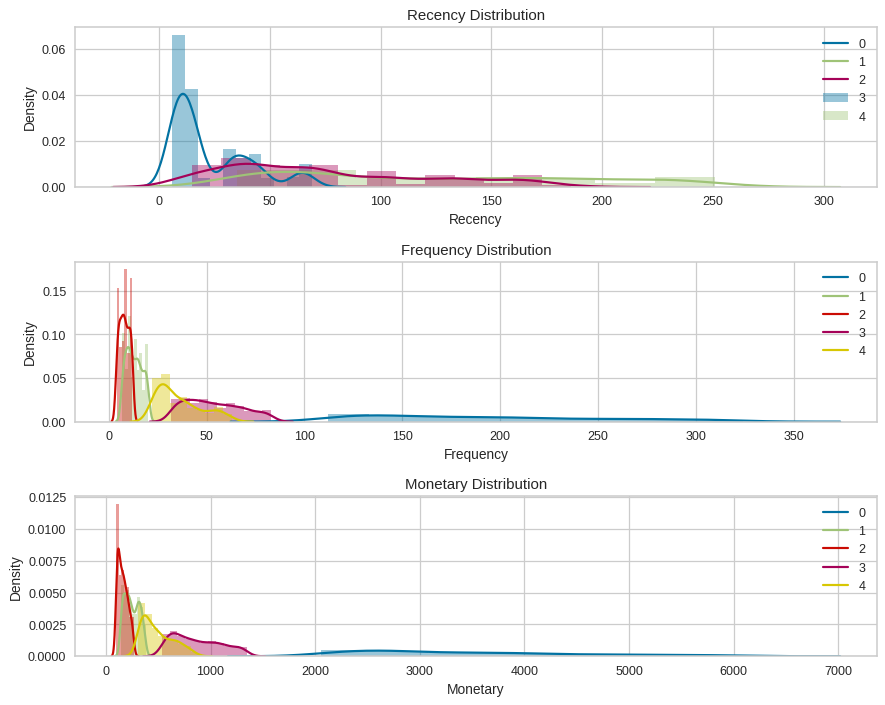

In [ ]:
# Fitting the model on n_clusters = 5 based on Elbow_Curve to visualise the segments.
kmc = KMeans(n_clusters=5,init="k-means++")           # Setting 5 Clusters
y = kmc.fit_predict(X)                                # Fitting the model
centers = kmc.cluster_centers_                        # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Elbow_Curve'     # Setting the title
segment_name = 'K-Means|5Cluster'
overlap_supress = 0.2
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



K-Means|4Cluster,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
0,96.610000,65.000000,60.420000,52.000000,1022.850000,833.330000,1544
1,136.640000,109.000000,13.750000,12.000000,292.510000,240.620000,966
2,15309.000000,15309.000000,28.710000,19.000000,498.690000,314.100000,849
3,181.450000,15.000000,267.120000,182.000000,6736.700000,3213.220000,980


K-Means|4Cluster,Last_visited,Purchase_frequency,Money_spent
0,16 to 158 days ago,Bought 34 to 77 times,Spent around 582 to 1246 Sterling
1,42 to 228 days ago,Bought 7 to 19 times,Spent around 156 to 346 Sterling
2,15309 to 15309 days ago,Bought 9 to 35 times,Spent around 166 to 519 Sterling
3,7 to 63 days ago,Bought 120 to 293 times,Spent around 2242 to 5293 Sterling


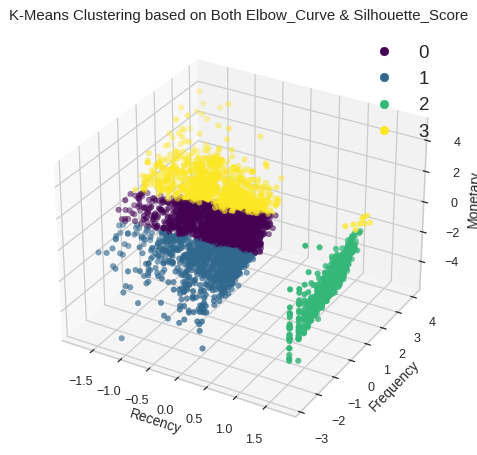

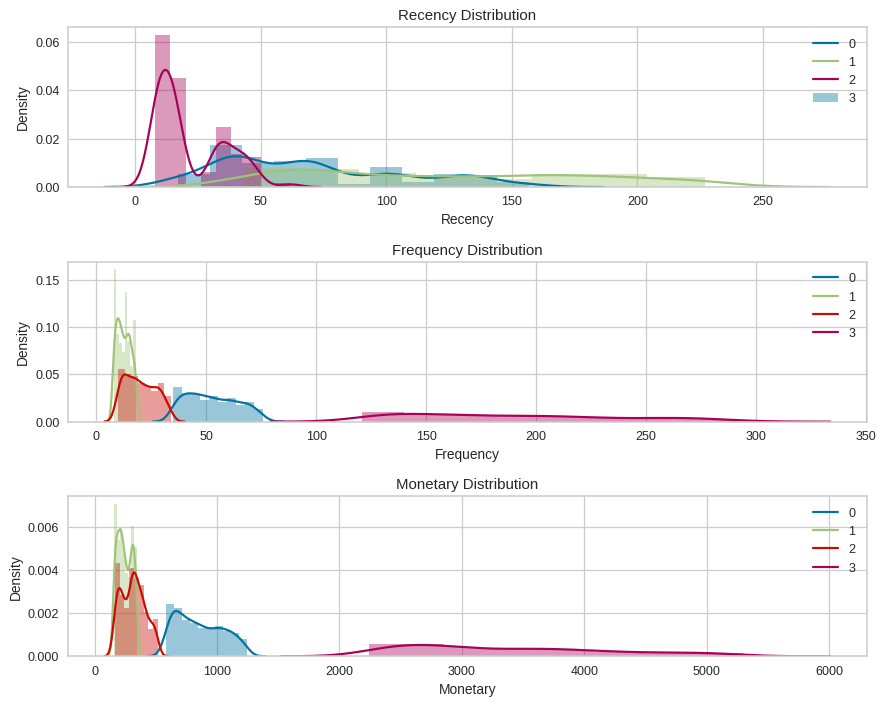

In [ ]:
# Fitting the model on n_clusters = 4 based on Both Elbow_Curve & Silhouette_Score to visualise the segments.
kmc = KMeans(n_clusters=4,init="k-means++")         # Setting 4 Clusters
y = kmc.fit_predict(X)                              # Fitting the model
centers = kmc.cluster_centers_                      # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Both Elbow_Curve & Silhouette_Score'         # Setting the title
segment_name = 'K-Means|4Cluster'
overlap_supress = 0.25
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

# **Hierarchical Clustering**


> Indented block



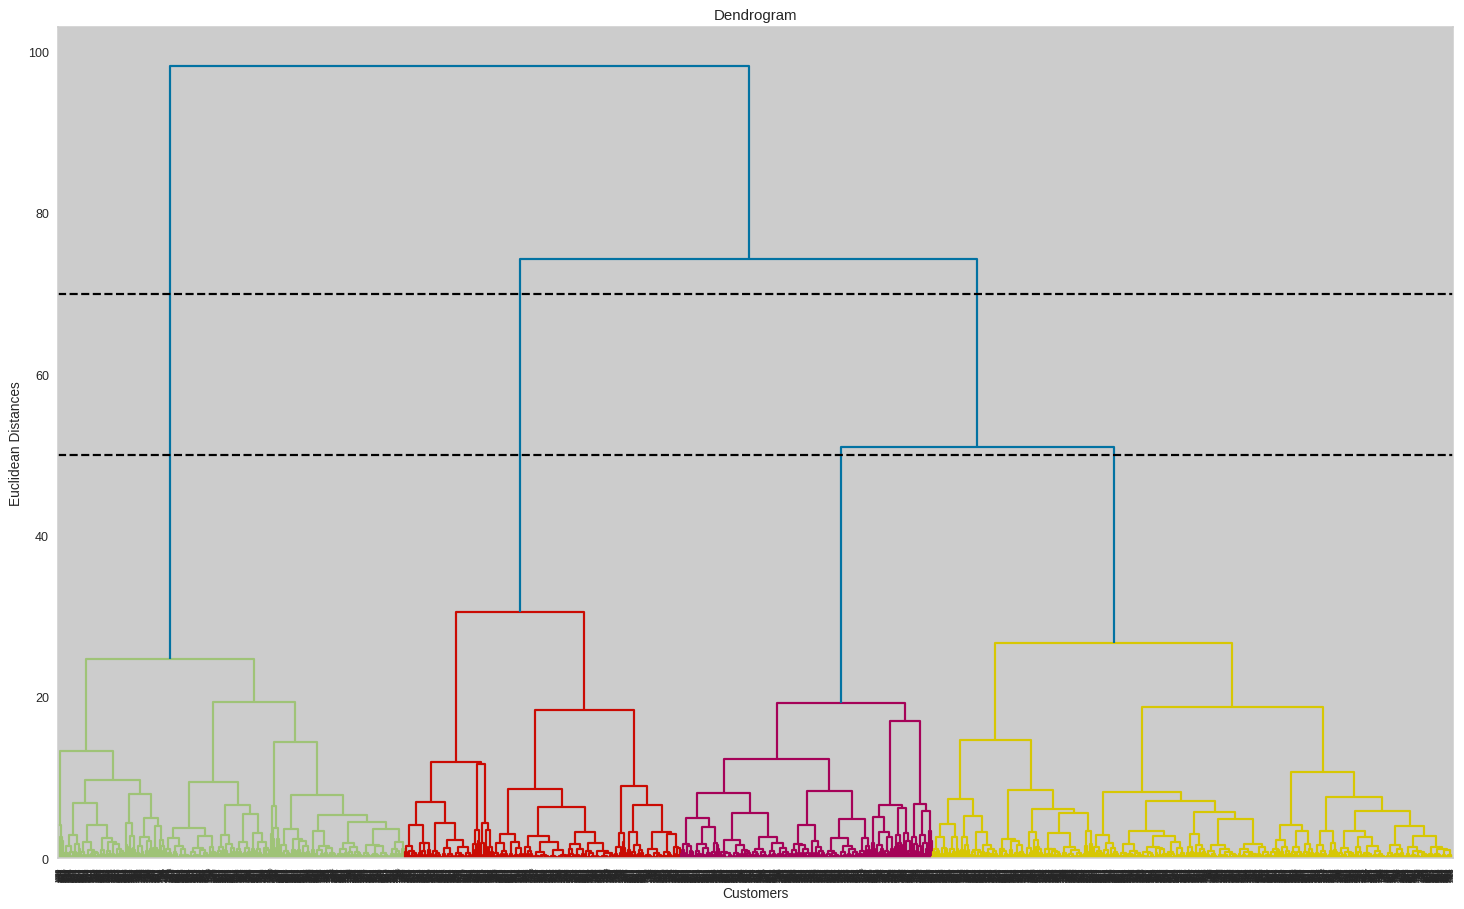

In [ ]:
# Using the Dendogram to Decide the number of clusters
plt.figure(figsize=(20,12), dpi=90)                         # Setting the figure size
dendrogram(linkage(X, method='ward'), color_threshold=50)   # using ward linkage method to differ similarities
plt.title('Dendrogram')                                     # Setting the title
plt.xlabel('Customers')                                     # Setting the x label
plt.ylabel('Euclidean Distances')                           # Setting y label
plt.axhline(y=70, color='black', linestyle='--')            # Setting the axis line for y=70
plt.axhline(y=50, color='black', linestyle='--')            # Setting the axis line for y=50
plt.show()

Interpretation:
1. We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line). We can set this threshold as 50 or 70 and draw a horizontal line as shown in dendogram above.
2. The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. The larger threshold (y=70) results in 2 clusters while the smaller (y=50) results in 3 clusters.



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



hierarchical|2Cluster,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
0,4106.170000,160.000000,38.520000,28.000000,605.880000,446.780000,3258
1,72.530000,16.000000,247.200000,163.000000,6395.250000,2995.720000,1081


hierarchical|2Cluster,Last_visited,Purchase_frequency,Money_spent
0,42 to 15309 days ago,Bought 13 to 52 times,Spent around 234 to 817 Sterling
1,7 to 65 days ago,Bought 108 to 271 times,Spent around 2073 to 5005 Sterling


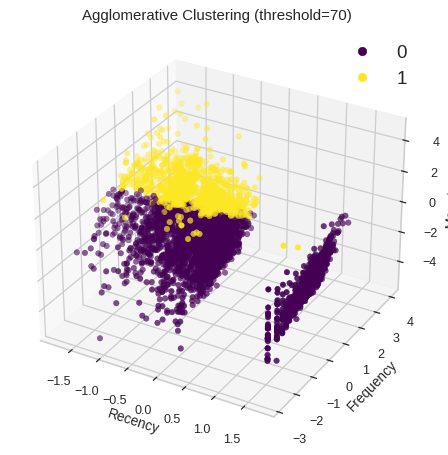

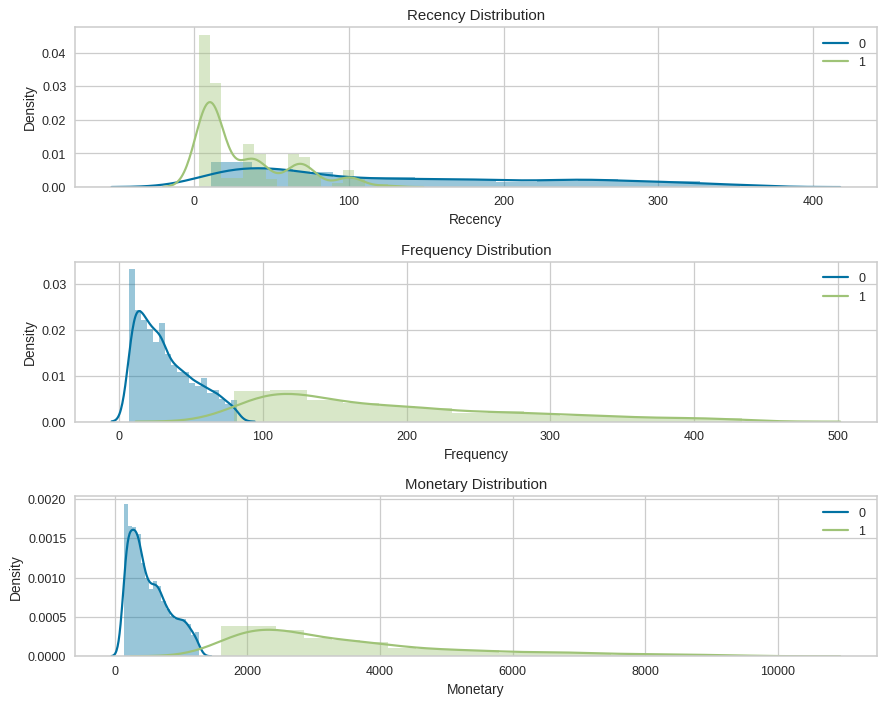

In [ ]:
# Fitting hierarchical clustering with number of clusters based on dendogram distance threshold = 70
ahc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')     # Initializing the model
y = ahc.fit_predict(X)                                                                # Fitting and predicting the model

# Lets visualize the clusters with n_clusters = 2
title = 'Agglomerative Clustering (threshold=70)'                                     # Setting the title
segment_name = 'hierarchical|2Cluster'
overlap_supress = 0.1
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



hierarchical|3Cluster,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
0,113.820000,73.000000,41.110000,31.000000,649.400000,533.660000,2402
1,72.530000,16.000000,247.200000,163.000000,6395.250000,2995.720000,1081
2,15309.000000,15309.000000,31.250000,20.000000,483.760000,315.930000,856


hierarchical|3Cluster,Last_visited,Purchase_frequency,Money_spent
0,31 to 192 days ago,Bought 15 to 57 times,Spent around 278 to 911 Sterling
1,7 to 65 days ago,Bought 108 to 271 times,Spent around 2073 to 5005 Sterling
2,15309 to 15309 days ago,Bought 9 to 37 times,Spent around 166 to 528 Sterling


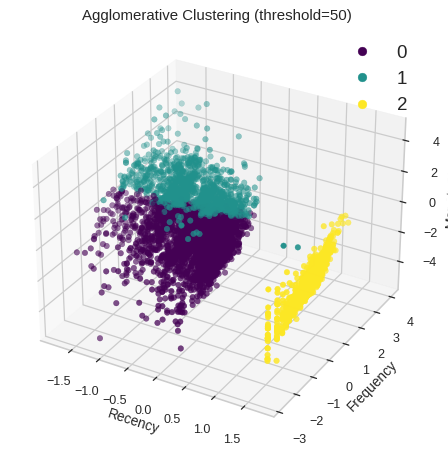

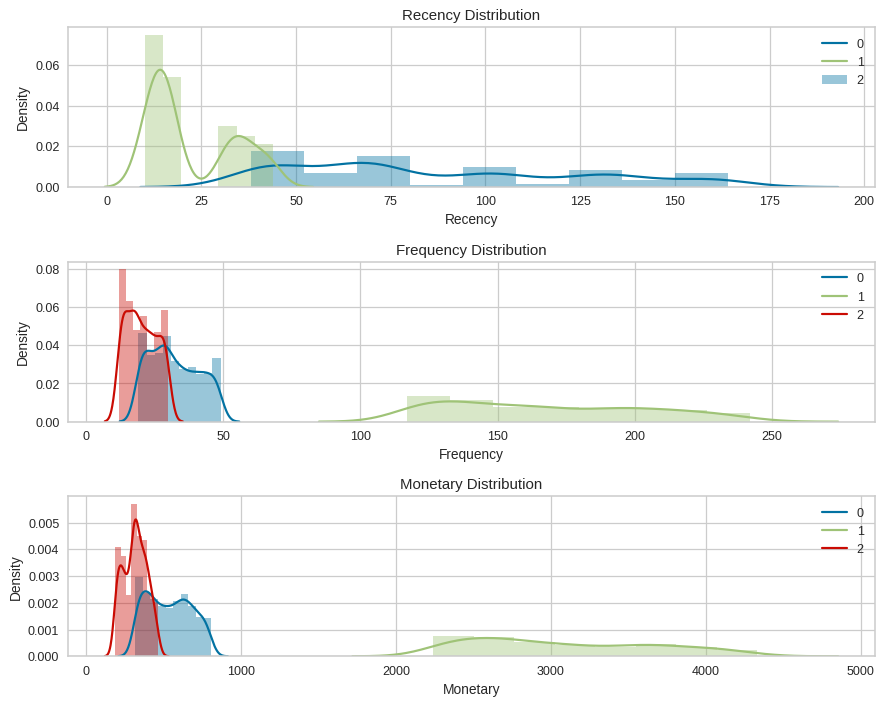

In [ ]:
# Fitting hierarchical clustering with number of clusters based on dendogram distance threshold = 50
ahc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')     # Initializing the model
y = ahc.fit_predict(X)                                                                # Fitting and predicting the model

# Lets visualize the clusters with n_clusters = 3
title = 'Agglomerative Clustering (threshold=50)'                                     # Setting the title
segment_name = 'hierarchical|3Cluster'
overlap_supress = 0.3
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

# **DBScan Clusterer**


> Indented block





Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



DBSCAN,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
-1,1964.080000,42.000000,127.920000,52.000000,3102.460000,735.660000,2239
0,15309.000000,15309.000000,20.880000,18.000000,371.520000,317.620000,518
1,140.980000,125.000000,52.650000,39.000000,986.350000,709.710000,1251
2,11.680000,11.000000,87.630000,77.500000,1622.400000,1420.000000,244
3,12.040000,13.000000,209.600000,211.000000,4066.130000,4067.290000,25
4,15309.000000,15309.000000,66.650000,67.000000,373.890000,363.790000,37
5,15309.000000,15309.000000,21.520000,21.000000,123.080000,119.930000,25


DBSCAN,Last_visited,Purchase_frequency,Money_spent
-1,9 to 186 days ago,Bought 15 to 151 times,Spent around 266 to 2465 Sterling
0,15309 to 15309 days ago,Bought 10 to 28 times,Spent around 185 to 477 Sterling
1,64 to 217 days ago,Bought 22 to 71 times,Spent around 385 to 1337 Sterling
2,9 to 15 days ago,Bought 57 to 112 times,Spent around 1060 to 2067 Sterling
3,9 to 14 days ago,Bought 191 to 224 times,Spent around 3811 to 4263 Sterling
4,15309 to 15309 days ago,Bought 56 to 73 times,Spent around 334 to 402 Sterling
5,15309 to 15309 days ago,Bought 19 to 24 times,Spent around 112 to 127 Sterling


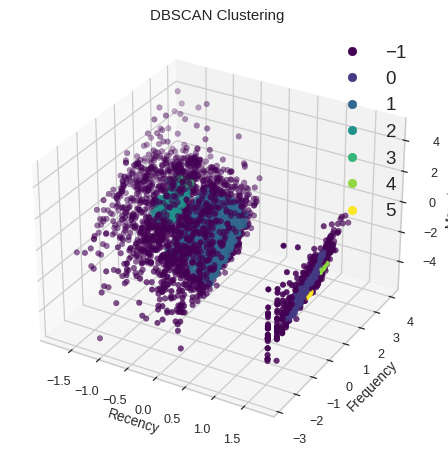

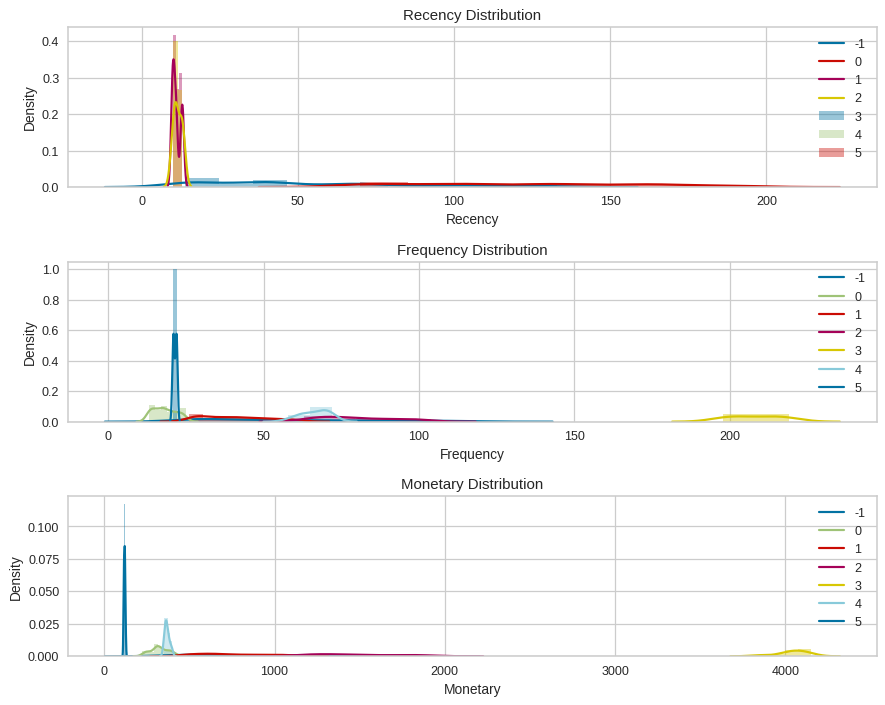

In [ ]:
# Fitting DBSCAN clusterer
dbsc = DBSCAN(eps=0.2, min_samples=25)                                # Initializing the model
y = dbsc.fit_predict(X)                                               # Fitting the model

# Plotting Clusters for Visualization
title = 'DBSCAN Clustering'                                           # Setting the title
segment_name = 'DBSCAN'
overlap_supress = 0.3
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

1. Density-based spatial clustering of applications with noise (DBSCAN) is an alternative to KMeans and hierarchical clustering. It does not require us to specify the number of clusters, as the clusters are formed by a process of linking neighbor points together.
2. It avoids outliers and identifies nested clusters within the data. The data is muddled and does not have major visible nested cluster, yet it has identified 4 clusters as shown above based on the hyperparameters defined.

# **Conclusion**


> Indented block



1. We started with a simple binning and quantile based simple segmentation model first then moved to more complex models because simple implementation helps having a first glance at the data and know where/how to exploit it better.
2. Then we moved to k-means clustering and visualized the results with different number of clusters. As we know there is no assurance that k-means will lead to the global best solution. We moved forward and tried Hierarchical Clustering and DBSCAN clusterer as well.
3. We created several useful clusters of customers on the basis of different metrics and methods to cateorize the customers on the basis of their beavioural attributes to define their valuability, loyality, profitability etc for the business. Though significantly separated clusters are not visible in the plots, but the clusters obtained is fairly valid and useful as per the  algorithms and the statistics extracted from the data.
4. Segments depends on how the business plans to use the results, and the level of granularity they want to see in the clusters. Keeping these points in view we clustered the major segments based on our understanding as per diffrent criteria as shown in the summary dataframe.


In [ ]:
# Summarizing the results obtained by clustering using various methods
summary = pd.DataFrame({"Clusterer": ['Binning','Quantile Cut', "K-Means", "K-Means", "K-Means", "Agglomerative","Agglomerative", "DBSCAN"],
                        'Criterion': ['RFM Score Binning', 'RFM Quantile Cut', 'Elbow Curve', 'Silhouette Score','Elbow Curve & Silhouette Score',
                                      'Dendogram (y=70)', 'Dendogram (y=50)', 'eps=0.2, min_samples=25'],
                        "Segments" : [4,4,5,2,4,2,3,4]},
                        index=['', '', '', '', '', '', '', ''])
summary.T

,,,,,,,,
Clusterer,Binning,Quantile Cut,K-Means,K-Means,K-Means,Agglomerative,Agglomerative,DBSCAN
Criterion,RFM Score Binning,RFM Quantile Cut,Elbow Curve,Silhouette Score,Elbow Curve & Silhouette Score,Dendogram (y=70),Dendogram (y=50),"eps=0.2, min_samples=25"
Segments,4,4,5,2,4,2,3,4


NOTE ALL THE VALUES SHOWN ARE APPROX!!

**VALUES MIN AND MAX ARE TAKEN FROM 25th PERCENTILE and 75th PERCENTILE OF FEATURES RESPECTIVELY**

# **Helper Functions**


> Indented block



In [ ]:
# Defining a function to print the output in the form of MarkDown
def printmd(string):
  '''
  col String : Type: String
  returns :MARKDOWN
  This functions allows us to print the output in the form of MarkDown
  '''
  display(Markdown(string))

# Setting List of 5 types of customers based on activities of the customer
customers_type_=["LOST POOR CUSTOMERS❌",
                'AVERAGE CUSTOMERS🥉',
                'RECENTLY VISITED AVERAGE CUSTOMERS❤',
                'GOOD CUSTOMERS🥈',
                'BEST CUSTOMERS💓',
                 'LOSING LOYAL CUSTOMERS❌']

In [ ]:
#Function to create new column of customer type
def function(x):
    if x==0:
      return "LOST POOR CUSTOMERS❌"
    elif x==1:
      return 'AVERAGE CUSTOMERS🥉'
    elif x==2:
      return 'RECENTLY VISITED AVERAGE CUSTOMERS❤'
    elif x==3:
      return 'GOOD CUSTOMERS🥈'
    elif x==4:
      return 'BEST CUSTOMERS💓'
    else:
      return 'LOSING LOYAL CUSTOMERS❌'

# Initializing an empty dict to store rank lists
rank_list_dict={}
def printing_conclusion(segment_name,rank_list_dict):
  # Storing the conclusion data frame into variable
  dataframe = conclusion[segment_name]
  #function to categorised customer type
  dataframe['customer_rating']=rank_list_dict[segment_name]
  dataframe['customers_type_']= dataframe['customer_rating'].apply(lambda x:function(x))
  # Displaying the conclusion dataframe
  return dataframe

# **1. Binning (4 Clusters)**

In [ ]:
# DEfining the segment name
segment_name = 'Binning'

# Manually Rating stars for the groups of customer
rank_list_dict[segment_name] = [0,1,3,4]

# Printing the conclusion in the form of Markdown
printing_conclusion(segment_name,rank_list_dict)

,Last_visited,Purchase_frequency,Money_spent,customer_rating,customers_type_
Binning,,,,,
1,196 to 15309 days ago,Bought 7 to 21 times,Spent around 138 to 328 Sterling,0,LOST POOR CUSTOMERS❌
2,43 to 260 days ago,Bought 18 to 41 times,Spent around 330 to 707 Sterling,1,AVERAGE CUSTOMERS🥉
3,14 to 128 days ago,Bought 45 to 101 times,Spent around 742 to 1657 Sterling,3,GOOD CUSTOMERS🥈
4,4 to 31 days ago,Bought 123 to 301 times,Spent around 2089 to 5459 Sterling,4,BEST CUSTOMERS💓


# **2. Quantile Cut (4 Clusters)**


> Indented block



In [ ]:
# DEfining the segment name
segment_name = 'QuantileCut'

# Manually Rating stars for the groups of customer
rank_list_dict[segment_name] = [0,5,3,4]

# Printing the conclusion in the form of Markdown
printing_conclusion(segment_name,rank_list_dict)

,Last_visited,Purchase_frequency,Money_spent,customer_rating,customers_type_
QuantileCut,,,,,
1,311 to 15309 days ago,Bought 8 to 33 times,Spent around 155 to 505 Sterling,0,LOST POOR CUSTOMERS❌
2,104 to 202 days ago,Bought 19 to 76 times,Spent around 339 to 1339 Sterling,5,LOSING LOYAL CUSTOMERS❌
3,34 to 65 days ago,Bought 27 to 121 times,Spent around 465 to 2044 Sterling,3,GOOD CUSTOMERS🥈
4,3 to 13 days ago,Bought 49 to 208 times,Spent around 745 to 3809 Sterling,4,BEST CUSTOMERS💓


# **3. K-Means (2 Clusters)**


> Indented block



In [ ]:
# DEfining the segment name
segment_name = 'K-Means|2Cluster'

# Manually Rating stars for the groups of customer
rank_list_dict[segment_name] = [0,4]

# Printing the conclusion in the form of Markdown
printing_conclusion(segment_name,rank_list_dict)

,Last_visited,Purchase_frequency,Money_spent,customer_rating,customers_type_
K-Means|2Cluster,,,,,
0,9 to 77 days ago,Bought 55 to 172 times,Spent around 925 to 3017 Sterling,0,LOST POOR CUSTOMERS❌
1,97 to 15309 days ago,Bought 9 to 29 times,Spent around 176 to 487 Sterling,4,BEST CUSTOMERS💓


## **4. K-Means (4 Clusters)**


> Indented block



In [ ]:
# DEfining the segment name
segment_name = 'K-Means|4Cluster'

# Manually Rating stars for the groups of customer
rank_list_dict[segment_name] = [0,2,4,5]

# Printing the conclusion in the form of Markdown
printing_conclusion(segment_name,rank_list_dict)

,Last_visited,Purchase_frequency,Money_spent,customer_rating,customers_type_
K-Means|4Cluster,,,,,
0,16 to 158 days ago,Bought 34 to 77 times,Spent around 582 to 1246 Sterling,0,LOST POOR CUSTOMERS❌
1,42 to 228 days ago,Bought 7 to 19 times,Spent around 156 to 346 Sterling,2,RECENTLY VISITED AVERAGE CUSTOMERS❤
2,15309 to 15309 days ago,Bought 9 to 35 times,Spent around 166 to 519 Sterling,4,BEST CUSTOMERS💓
3,7 to 63 days ago,Bought 120 to 293 times,Spent around 2242 to 5293 Sterling,5,LOSING LOYAL CUSTOMERS❌


# **5. K-Means (5 Clusters)**


> Indented block



In [ ]:
# DEfining the segment name
segment_name = 'K-Means|5Cluster'

# Manually Rating stars for the groups of customer
rank_list_dict[segment_name] = [4,0,5,1,3]

# Printing the conclusion in the form of Markdown
printing_conclusion(segment_name,rank_list_dict)

,Last_visited,Purchase_frequency,Money_spent,customer_rating,customers_type_
K-Means|5Cluster,,,,,
0,7 to 62 days ago,Bought 119 to 292 times,Spent around 2242 to 5247 Sterling,4,BEST CUSTOMERS💓
1,42 to 228 days ago,Bought 7 to 19 times,Spent around 157 to 349 Sterling,0,LOST POOR CUSTOMERS❌
2,15309 to 15309 days ago,Bought 5 to 12 times,Spent around 108 to 235 Sterling,5,LOSING LOYAL CUSTOMERS❌
3,16 to 158 days ago,Bought 35 to 77 times,Spent around 583 to 1246 Sterling,1,AVERAGE CUSTOMERS🥉
4,15309 to 15309 days ago,Bought 23 to 55 times,Spent around 327 to 727 Sterling,3,GOOD CUSTOMERS🥈


# **6. Agglomerative (2 Clusters)**


> Indented block



In [ ]:
# DEfining the segment name
segment_name = 'hierarchical|2Cluster'

# Manually Rating stars for the groups of customer
rank_list_dict[segment_name] = [1,4]

# Printing the conclusion in the form of Markdown
printing_conclusion(segment_name,rank_list_dict)

,Last_visited,Purchase_frequency,Money_spent,customer_rating,customers_type_
hierarchical|2Cluster,,,,,
0,42 to 15309 days ago,Bought 13 to 52 times,Spent around 234 to 817 Sterling,1,AVERAGE CUSTOMERS🥉
1,7 to 65 days ago,Bought 108 to 271 times,Spent around 2073 to 5005 Sterling,4,BEST CUSTOMERS💓


## **7. Agglomerative (3 Clusters)**

In [ ]:
# DEfining the segment name
segment_name = 'hierarchical|3Cluster'

# Manually Rating stars for the groups of customer
rank_list_dict[segment_name] = [4,5,0]

# Printing the conclusion in the form of Markdown
printing_conclusion(segment_name,rank_list_dict)

,Last_visited,Purchase_frequency,Money_spent,customer_rating,customers_type_
hierarchical|3Cluster,,,,,
0,31 to 192 days ago,Bought 15 to 57 times,Spent around 278 to 911 Sterling,4,BEST CUSTOMERS💓
1,7 to 65 days ago,Bought 108 to 271 times,Spent around 2073 to 5005 Sterling,5,LOSING LOYAL CUSTOMERS❌
2,15309 to 15309 days ago,Bought 9 to 37 times,Spent around 166 to 528 Sterling,0,LOST POOR CUSTOMERS❌


## **8. DBSCAN (4 Clusters)**

In [139]:
# DEfining the segment name
segment_name = 'DBSCAN'

# Manually Rating stars for the groups of customer
rank_list_dict['DBSCAN'] = [1, 0, 3, 5, 0, 0, 0]

# Printing the conclusion in the form of Markdown
printing_conclusion(segment_name,rank_list_dict)

,Last_visited,Purchase_frequency,Money_spent,customer_rating,customers_type_
DBSCAN,,,,,
-1,9 to 186 days ago,Bought 15 to 151 times,Spent around 266 to 2465 Sterling,1,AVERAGE CUSTOMERS🥉
0,15309 to 15309 days ago,Bought 10 to 28 times,Spent around 185 to 477 Sterling,0,LOST POOR CUSTOMERS❌
1,64 to 217 days ago,Bought 22 to 71 times,Spent around 385 to 1337 Sterling,3,GOOD CUSTOMERS🥈
2,9 to 15 days ago,Bought 57 to 112 times,Spent around 1060 to 2067 Sterling,5,LOSING LOYAL CUSTOMERS❌
3,9 to 14 days ago,Bought 191 to 224 times,Spent around 3811 to 4263 Sterling,0,LOST POOR CUSTOMERS❌
4,15309 to 15309 days ago,Bought 56 to 73 times,Spent around 334 to 402 Sterling,0,LOST POOR CUSTOMERS❌
5,15309 to 15309 days ago,Bought 19 to 24 times,Spent around 112 to 127 Sterling,0,LOST POOR CUSTOMERS❌


##**Overall Summary**

In [ ]:
# creating a dataframe to show the segments obtained by each method
print("Customer Segments Obtained From Clustering Analysis<br><br>")
final_df = pd.DataFrame()
for segment_name in rank_list_dict:
  value = ["Yes" if j in rank_list_dict[segment_name] else "No" for j in range(6)]
  final_df[segment_name] = pd.Series(value, index=customers_type_)
final_df.T

Here, we have successfully segmented/ divided the customer into clusters by using different model like K-means Clustering with 2,4,5 clusters, Hierarchical Clustering with 2 and 3 clusters, DBSCAN Clustring based on Recency, Frequency, Monetary. and on that basis we can give more attension to those customer, who are being neglected by us. also we can enhanced our performance by incentivising those customer who are good and best by category wise. by clustering the data we can reduce the churn rate of loyal customers by focusing on their services. we can use customer targeting approach, marketing campaigns, churn prediction, etc

# **Thankyou**